## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
trimmed_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'])
trimmed_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = merged_df.loc[merged_df.duplicated(['Mouse ID','Timepoint']),:]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
trimmed_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'])
trimmed_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
trimmed_df['Mouse ID'].value_counts()

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
trimmed_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_growth_df = trimmed_df[['Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
#tumor_growth_df_t = tumor_growth_df.loc[tumor_growth_df.duplicated(subset=['Drug Regimen','Timepoint'], keep='last')]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Ramicane_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ramicane']
Ramicane_df_mean   = Ramicane_df['Tumor Volume (mm3)'].mean()
Ramicane_df_median = Ramicane_df['Tumor Volume (mm3)'].median()
Ramicane_df_var    = Ramicane_df['Tumor Volume (mm3)'].var()
Ramicane_df_stdev  = Ramicane_df['Tumor Volume (mm3)'].std()
Ramicane_df_sem    = Ramicane_df['Tumor Volume (mm3)'].sem()
Ramicane_df_count  = Ramicane_df['Tumor Volume (mm3)'].count()

Ramicane_df_0  = Ramicane_df.loc[Ramicane_df['Timepoint'] == 0]
Ramicane_df_0_mean   = Ramicane_df_0['Tumor Volume (mm3)'].mean()
Ramicane_df_0_median = Ramicane_df_0['Tumor Volume (mm3)'].median()
Ramicane_df_0_var    = Ramicane_df_0['Tumor Volume (mm3)'].var()
Ramicane_df_0_stdev  = Ramicane_df_0['Tumor Volume (mm3)'].std()
Ramicane_df_0_sem    = Ramicane_df_0['Tumor Volume (mm3)'].sem()
Ramicane_df_0_count  = Ramicane_df_0['Tumor Volume (mm3)'].count()

Ramicane_df_5  = Ramicane_df.loc[Ramicane_df['Timepoint'] == 5]
Ramicane_df_5_mean   = Ramicane_df_5['Tumor Volume (mm3)'].mean()
Ramicane_df_5_median = Ramicane_df_5['Tumor Volume (mm3)'].median()
Ramicane_df_5_var    = Ramicane_df_5['Tumor Volume (mm3)'].var()
Ramicane_df_5_stdev  = Ramicane_df_5['Tumor Volume (mm3)'].std()
Ramicane_df_5_sem    = Ramicane_df_5['Tumor Volume (mm3)'].sem()
Ramicane_df_5_count  = Ramicane_df_5['Tumor Volume (mm3)'].count()

Ramicane_df_10 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 10]
Ramicane_df_10_mean   = Ramicane_df_10['Tumor Volume (mm3)'].mean()
Ramicane_df_10_median = Ramicane_df_10['Tumor Volume (mm3)'].median()
Ramicane_df_10_var    = Ramicane_df_10['Tumor Volume (mm3)'].var()
Ramicane_df_10_stdev  = Ramicane_df_10['Tumor Volume (mm3)'].std()
Ramicane_df_10_sem    = Ramicane_df_10['Tumor Volume (mm3)'].sem()
Ramicane_df_10_count  = Ramicane_df_10['Tumor Volume (mm3)'].count()

Ramicane_df_15 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 15]
Ramicane_df_15_mean   = Ramicane_df_15['Tumor Volume (mm3)'].mean()
Ramicane_df_15_median = Ramicane_df_15['Tumor Volume (mm3)'].median()
Ramicane_df_15_var    = Ramicane_df_15['Tumor Volume (mm3)'].var()
Ramicane_df_15_stdev  = Ramicane_df_15['Tumor Volume (mm3)'].std()
Ramicane_df_15_sem    = Ramicane_df_15['Tumor Volume (mm3)'].sem()
Ramicane_df_15_count  = Ramicane_df_15['Tumor Volume (mm3)'].count()

Ramicane_df_20 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 20]
Ramicane_df_20_mean   = Ramicane_df_20['Tumor Volume (mm3)'].mean()
Ramicane_df_20_median = Ramicane_df_20['Tumor Volume (mm3)'].median()
Ramicane_df_20_var    = Ramicane_df_20['Tumor Volume (mm3)'].var()
Ramicane_df_20_stdev  = Ramicane_df_20['Tumor Volume (mm3)'].std()
Ramicane_df_20_sem    = Ramicane_df_20['Tumor Volume (mm3)'].sem()
Ramicane_df_20_count  = Ramicane_df_20['Tumor Volume (mm3)'].count()

Ramicane_df_25 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 25]
Ramicane_df_25_mean   = Ramicane_df_25['Tumor Volume (mm3)'].mean()
Ramicane_df_25_median = Ramicane_df_25['Tumor Volume (mm3)'].median()
Ramicane_df_25_var    = Ramicane_df_25['Tumor Volume (mm3)'].var()
Ramicane_df_25_stdev  = Ramicane_df_25['Tumor Volume (mm3)'].std()
Ramicane_df_25_sem    = Ramicane_df_25['Tumor Volume (mm3)'].sem()
Ramicane_df_25_count  = Ramicane_df_25['Tumor Volume (mm3)'].count()

Ramicane_df_30 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 30]
Ramicane_df_30_mean   = Ramicane_df_30['Tumor Volume (mm3)'].mean()
Ramicane_df_30_median = Ramicane_df_30['Tumor Volume (mm3)'].median()
Ramicane_df_30_var    = Ramicane_df_30['Tumor Volume (mm3)'].var()
Ramicane_df_30_stdev  = Ramicane_df_30['Tumor Volume (mm3)'].std()
Ramicane_df_30_sem    = Ramicane_df_30['Tumor Volume (mm3)'].sem()
Ramicane_df_30_count  = Ramicane_df_30['Tumor Volume (mm3)'].count()

Ramicane_df_35 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 35]
Ramicane_df_35_mean   = Ramicane_df_35['Tumor Volume (mm3)'].mean()
Ramicane_df_35_median = Ramicane_df_35['Tumor Volume (mm3)'].median()
Ramicane_df_35_var    = Ramicane_df_35['Tumor Volume (mm3)'].var()
Ramicane_df_35_stdev  = Ramicane_df_35['Tumor Volume (mm3)'].std()
Ramicane_df_35_sem    = Ramicane_df_35['Tumor Volume (mm3)'].sem()
Ramicane_df_35_count  = Ramicane_df_35['Tumor Volume (mm3)'].count()

Ramicane_df_40 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 40]
Ramicane_df_40_mean   = Ramicane_df_40['Tumor Volume (mm3)'].mean()
Ramicane_df_40_median = Ramicane_df_40['Tumor Volume (mm3)'].median()
Ramicane_df_40_var    = Ramicane_df_40['Tumor Volume (mm3)'].var()
Ramicane_df_40_stdev  = Ramicane_df_40['Tumor Volume (mm3)'].std()
Ramicane_df_40_sem    = Ramicane_df_40['Tumor Volume (mm3)'].sem()
Ramicane_df_40_count  = Ramicane_df_40['Tumor Volume (mm3)'].count()

Ramicane_df_45 = Ramicane_df.loc[Ramicane_df['Timepoint'] == 45]
Ramicane_df_45_mean   = Ramicane_df_45['Tumor Volume (mm3)'].mean()
Ramicane_df_45_median = Ramicane_df_45['Tumor Volume (mm3)'].median()
Ramicane_df_45_var    = Ramicane_df_45['Tumor Volume (mm3)'].var()
Ramicane_df_45_stdev  = Ramicane_df_45['Tumor Volume (mm3)'].std()
Ramicane_df_45_sem    = Ramicane_df_45['Tumor Volume (mm3)'].sem()
Ramicane_df_45_count  = Ramicane_df_45['Tumor Volume (mm3)'].count()



In [9]:
Capomulin_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Capomulin']
Capomulin_df_mean   = Capomulin_df['Tumor Volume (mm3)'].mean()
Capomulin_df_median = Capomulin_df['Tumor Volume (mm3)'].median()
Capomulin_df_var    = Capomulin_df['Tumor Volume (mm3)'].var()
Capomulin_df_stdev  = Capomulin_df['Tumor Volume (mm3)'].std()
Capomulin_df_sem    = Capomulin_df['Tumor Volume (mm3)'].sem()
Capomulin_df_count  = Capomulin_df['Tumor Volume (mm3)'].count()

Capomulin_df_0  = Capomulin_df.loc[Capomulin_df['Timepoint'] == 0]
Capomulin_df_0_mean   = Capomulin_df_0['Tumor Volume (mm3)'].mean()
Capomulin_df_0_median = Capomulin_df_0['Tumor Volume (mm3)'].median()
Capomulin_df_0_var    = Capomulin_df_0['Tumor Volume (mm3)'].var()
Capomulin_df_0_stdev  = Capomulin_df_0['Tumor Volume (mm3)'].std()
Capomulin_df_0_sem    = Capomulin_df_0['Tumor Volume (mm3)'].sem()
Capomulin_df_0_count  = Capomulin_df_0['Tumor Volume (mm3)'].count()

Capomulin_df_5  = Capomulin_df.loc[Capomulin_df['Timepoint'] == 5]
Capomulin_df_5_mean   = Capomulin_df_5['Tumor Volume (mm3)'].mean()
Capomulin_df_5_median = Capomulin_df_5['Tumor Volume (mm3)'].median()
Capomulin_df_5_var    = Capomulin_df_5['Tumor Volume (mm3)'].var()
Capomulin_df_5_stdev  = Capomulin_df_5['Tumor Volume (mm3)'].std()
Capomulin_df_5_sem    = Capomulin_df_5['Tumor Volume (mm3)'].sem()
Capomulin_df_5_count  = Capomulin_df_5['Tumor Volume (mm3)'].count()

Capomulin_df_10 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 10]
Capomulin_df_10_mean   = Capomulin_df_10['Tumor Volume (mm3)'].mean()
Capomulin_df_10_median = Capomulin_df_10['Tumor Volume (mm3)'].median()
Capomulin_df_10_var    = Capomulin_df_10['Tumor Volume (mm3)'].var()
Capomulin_df_10_stdev  = Capomulin_df_10['Tumor Volume (mm3)'].std()
Capomulin_df_10_sem    = Capomulin_df_10['Tumor Volume (mm3)'].sem()
Capomulin_df_10_count  = Capomulin_df_10['Tumor Volume (mm3)'].count()

Capomulin_df_15 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 15]
Capomulin_df_15_mean   = Capomulin_df_15['Tumor Volume (mm3)'].mean()
Capomulin_df_15_median = Capomulin_df_15['Tumor Volume (mm3)'].median()
Capomulin_df_15_var    = Capomulin_df_15['Tumor Volume (mm3)'].var()
Capomulin_df_15_stdev  = Capomulin_df_15['Tumor Volume (mm3)'].std()
Capomulin_df_15_sem    = Capomulin_df_15['Tumor Volume (mm3)'].sem()
Capomulin_df_15_count  = Capomulin_df_15['Tumor Volume (mm3)'].count()

Capomulin_df_20 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 20]
Capomulin_df_20_mean   = Capomulin_df_20['Tumor Volume (mm3)'].mean()
Capomulin_df_20_median = Capomulin_df_20['Tumor Volume (mm3)'].median()
Capomulin_df_20_var    = Capomulin_df_20['Tumor Volume (mm3)'].var()
Capomulin_df_20_stdev  = Capomulin_df_20['Tumor Volume (mm3)'].std()
Capomulin_df_20_sem    = Capomulin_df_20['Tumor Volume (mm3)'].sem()
Capomulin_df_20_count  = Capomulin_df_20['Tumor Volume (mm3)'].count()

Capomulin_df_25 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 25]
Capomulin_df_25_mean   = Capomulin_df_25['Tumor Volume (mm3)'].mean()
Capomulin_df_25_median = Capomulin_df_25['Tumor Volume (mm3)'].median()
Capomulin_df_25_var    = Capomulin_df_25['Tumor Volume (mm3)'].var()
Capomulin_df_25_stdev  = Capomulin_df_25['Tumor Volume (mm3)'].std()
Capomulin_df_25_sem    = Capomulin_df_25['Tumor Volume (mm3)'].sem()
Capomulin_df_25_count  = Capomulin_df_25['Tumor Volume (mm3)'].count()

Capomulin_df_30 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 30]
Capomulin_df_30_mean   = Capomulin_df_30['Tumor Volume (mm3)'].mean()
Capomulin_df_30_median = Capomulin_df_30['Tumor Volume (mm3)'].median()
Capomulin_df_30_var    = Capomulin_df_30['Tumor Volume (mm3)'].var()
Capomulin_df_30_stdev  = Capomulin_df_30['Tumor Volume (mm3)'].std()
Capomulin_df_30_sem    = Capomulin_df_30['Tumor Volume (mm3)'].sem()
Capomulin_df_30_count  = Capomulin_df_30['Tumor Volume (mm3)'].count()

Capomulin_df_35 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 35]
Capomulin_df_35_mean   = Capomulin_df_35['Tumor Volume (mm3)'].mean()
Capomulin_df_35_median = Capomulin_df_35['Tumor Volume (mm3)'].median()
Capomulin_df_35_var    = Capomulin_df_35['Tumor Volume (mm3)'].var()
Capomulin_df_35_stdev  = Capomulin_df_35['Tumor Volume (mm3)'].std()
Capomulin_df_35_sem    = Capomulin_df_35['Tumor Volume (mm3)'].sem()
Capomulin_df_35_count  = Capomulin_df_35['Tumor Volume (mm3)'].count()

Capomulin_df_40 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 40]
Capomulin_df_40_mean   = Capomulin_df_40['Tumor Volume (mm3)'].mean()
Capomulin_df_40_median = Capomulin_df_40['Tumor Volume (mm3)'].median()
Capomulin_df_40_var    = Capomulin_df_40['Tumor Volume (mm3)'].var()
Capomulin_df_40_stdev  = Capomulin_df_40['Tumor Volume (mm3)'].std()
Capomulin_df_40_sem    = Capomulin_df_40['Tumor Volume (mm3)'].sem()
Capomulin_df_40_count  = Capomulin_df_40['Tumor Volume (mm3)'].count()

Capomulin_df_45 = Capomulin_df.loc[Capomulin_df['Timepoint'] == 45]
Capomulin_df_45_mean   = Capomulin_df_45['Tumor Volume (mm3)'].mean()
Capomulin_df_45_median = Capomulin_df_45['Tumor Volume (mm3)'].median()
Capomulin_df_45_var    = Capomulin_df_45['Tumor Volume (mm3)'].var()
Capomulin_df_45_stdev  = Capomulin_df_45['Tumor Volume (mm3)'].std()
Capomulin_df_45_sem    = Capomulin_df_45['Tumor Volume (mm3)'].sem()
Capomulin_df_45_count  = Capomulin_df_45['Tumor Volume (mm3)'].count()

In [10]:
Ketapril_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ketapril']
Ketapril_df_mean   = Ketapril_df['Tumor Volume (mm3)'].mean()
Ketapril_df_median = Ketapril_df['Tumor Volume (mm3)'].median()
Ketapril_df_var    = Ketapril_df['Tumor Volume (mm3)'].var()
Ketapril_df_stdev  = Ketapril_df['Tumor Volume (mm3)'].std()
Ketapril_df_sem    = Ketapril_df['Tumor Volume (mm3)'].sem()
Ketapril_df_count  = Ketapril_df['Tumor Volume (mm3)'].count()

Ketapril_df_0  = Ketapril_df.loc[Ketapril_df['Timepoint'] == 0]
Ketapril_df_0_mean   = Ketapril_df_0['Tumor Volume (mm3)'].mean()
Ketapril_df_0_median = Ketapril_df_0['Tumor Volume (mm3)'].median()
Ketapril_df_0_var    = Ketapril_df_0['Tumor Volume (mm3)'].var()
Ketapril_df_0_stdev  = Ketapril_df_0['Tumor Volume (mm3)'].std()
Ketapril_df_0_sem    = Ketapril_df_0['Tumor Volume (mm3)'].sem()
Ketapril_df_0_count  = Ketapril_df_0['Tumor Volume (mm3)'].count()

Ketapril_df_5  = Ketapril_df.loc[Ketapril_df['Timepoint'] == 5]
Ketapril_df_5_mean   = Ketapril_df_5['Tumor Volume (mm3)'].mean()
Ketapril_df_5_median = Ketapril_df_5['Tumor Volume (mm3)'].median()
Ketapril_df_5_var    = Ketapril_df_5['Tumor Volume (mm3)'].var()
Ketapril_df_5_stdev  = Ketapril_df_5['Tumor Volume (mm3)'].std()
Ketapril_df_5_sem    = Ketapril_df_5['Tumor Volume (mm3)'].sem()
Ketapril_df_5_count  = Ketapril_df_5['Tumor Volume (mm3)'].count()

Ketapril_df_10 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 10]
Ketapril_df_10_mean   = Ketapril_df_10['Tumor Volume (mm3)'].mean()
Ketapril_df_10_median = Ketapril_df_10['Tumor Volume (mm3)'].median()
Ketapril_df_10_var    = Ketapril_df_10['Tumor Volume (mm3)'].var()
Ketapril_df_10_stdev  = Ketapril_df_10['Tumor Volume (mm3)'].std()
Ketapril_df_10_sem    = Ketapril_df_10['Tumor Volume (mm3)'].sem()
Ketapril_df_10_count  = Ketapril_df_10['Tumor Volume (mm3)'].count()

Ketapril_df_15 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 15]
Ketapril_df_15_mean   = Ketapril_df_15['Tumor Volume (mm3)'].mean()
Ketapril_df_15_median = Ketapril_df_15['Tumor Volume (mm3)'].median()
Ketapril_df_15_var    = Ketapril_df_15['Tumor Volume (mm3)'].var()
Ketapril_df_15_stdev  = Ketapril_df_15['Tumor Volume (mm3)'].std()
Ketapril_df_15_sem    = Ketapril_df_15['Tumor Volume (mm3)'].sem()
Ketapril_df_15_count  = Ketapril_df_15['Tumor Volume (mm3)'].count()

Ketapril_df_20 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 20]
Ketapril_df_20_mean   = Ketapril_df_20['Tumor Volume (mm3)'].mean()
Ketapril_df_20_median = Ketapril_df_20['Tumor Volume (mm3)'].median()
Ketapril_df_20_var    = Ketapril_df_20['Tumor Volume (mm3)'].var()
Ketapril_df_20_stdev  = Ketapril_df_20['Tumor Volume (mm3)'].std()
Ketapril_df_20_sem    = Ketapril_df_20['Tumor Volume (mm3)'].sem()
Ketapril_df_20_count  = Ketapril_df_20['Tumor Volume (mm3)'].count()

Ketapril_df_25 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 25]
Ketapril_df_25_mean   = Ketapril_df_25['Tumor Volume (mm3)'].mean()
Ketapril_df_25_median = Ketapril_df_25['Tumor Volume (mm3)'].median()
Ketapril_df_25_var    = Ketapril_df_25['Tumor Volume (mm3)'].var()
Ketapril_df_25_stdev  = Ketapril_df_25['Tumor Volume (mm3)'].std()
Ketapril_df_25_sem    = Ketapril_df_25['Tumor Volume (mm3)'].sem()
Ketapril_df_25_count  = Ketapril_df_25['Tumor Volume (mm3)'].count()

Ketapril_df_30 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 30]
Ketapril_df_30_mean   = Ketapril_df_30['Tumor Volume (mm3)'].mean()
Ketapril_df_30_median = Ketapril_df_30['Tumor Volume (mm3)'].median()
Ketapril_df_30_var    = Ketapril_df_30['Tumor Volume (mm3)'].var()
Ketapril_df_30_stdev  = Ketapril_df_30['Tumor Volume (mm3)'].std()
Ketapril_df_30_sem    = Ketapril_df_30['Tumor Volume (mm3)'].sem()
Ketapril_df_30_count  = Ketapril_df_30['Tumor Volume (mm3)'].count()

Ketapril_df_35 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 35]
Ketapril_df_35_mean   = Ketapril_df_35['Tumor Volume (mm3)'].mean()
Ketapril_df_35_median = Ketapril_df_35['Tumor Volume (mm3)'].median()
Ketapril_df_35_var    = Ketapril_df_35['Tumor Volume (mm3)'].var()
Ketapril_df_35_stdev  = Ketapril_df_35['Tumor Volume (mm3)'].std()
Ketapril_df_35_sem    = Ketapril_df_35['Tumor Volume (mm3)'].sem()
Ketapril_df_35_count  = Ketapril_df_35['Tumor Volume (mm3)'].count()

Ketapril_df_40 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 40]
Ketapril_df_40_mean   = Ketapril_df_40['Tumor Volume (mm3)'].mean()
Ketapril_df_40_median = Ketapril_df_40['Tumor Volume (mm3)'].median()
Ketapril_df_40_var    = Ketapril_df_40['Tumor Volume (mm3)'].var()
Ketapril_df_40_stdev  = Ketapril_df_40['Tumor Volume (mm3)'].std()
Ketapril_df_40_sem    = Ketapril_df_40['Tumor Volume (mm3)'].sem()
Ketapril_df_40_count  = Ketapril_df_40['Tumor Volume (mm3)'].count()

Ketapril_df_45 = Ketapril_df.loc[Ketapril_df['Timepoint'] == 45]
Ketapril_df_45_mean   = Ketapril_df_45['Tumor Volume (mm3)'].mean()
Ketapril_df_45_median = Ketapril_df_45['Tumor Volume (mm3)'].median()
Ketapril_df_45_var    = Ketapril_df_45['Tumor Volume (mm3)'].var()
Ketapril_df_45_stdev  = Ketapril_df_45['Tumor Volume (mm3)'].std()
Ketapril_df_45_sem    = Ketapril_df_45['Tumor Volume (mm3)'].sem()
Ketapril_df_45_count  = Ketapril_df_45['Tumor Volume (mm3)'].count()

In [11]:
Naftisol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Naftisol']
Naftisol_df_mean   = Naftisol_df['Tumor Volume (mm3)'].mean()
Naftisol_df_median = Naftisol_df['Tumor Volume (mm3)'].median()
Naftisol_df_var    = Naftisol_df['Tumor Volume (mm3)'].var()
Naftisol_df_stdev  = Naftisol_df['Tumor Volume (mm3)'].std()
Naftisol_df_sem    = Naftisol_df['Tumor Volume (mm3)'].sem()
Naftisol_df_count  = Naftisol_df['Tumor Volume (mm3)'].count()

Naftisol_df_0  = Naftisol_df.loc[Naftisol_df['Timepoint'] == 0]
Naftisol_df_0_mean   = Naftisol_df_0['Tumor Volume (mm3)'].mean()
Naftisol_df_0_median = Naftisol_df_0['Tumor Volume (mm3)'].median()
Naftisol_df_0_var    = Naftisol_df_0['Tumor Volume (mm3)'].var()
Naftisol_df_0_stdev  = Naftisol_df_0['Tumor Volume (mm3)'].std()
Naftisol_df_0_sem    = Naftisol_df_0['Tumor Volume (mm3)'].sem()
Naftisol_df_0_count  = Naftisol_df_0['Tumor Volume (mm3)'].count()

Naftisol_df_5  = Naftisol_df.loc[Naftisol_df['Timepoint'] == 5]
Naftisol_df_5_mean   = Naftisol_df_5['Tumor Volume (mm3)'].mean()
Naftisol_df_5_median = Naftisol_df_5['Tumor Volume (mm3)'].median()
Naftisol_df_5_var    = Naftisol_df_5['Tumor Volume (mm3)'].var()
Naftisol_df_5_stdev  = Naftisol_df_5['Tumor Volume (mm3)'].std()
Naftisol_df_5_sem    = Naftisol_df_5['Tumor Volume (mm3)'].sem()
Naftisol_df_5_count  = Naftisol_df_5['Tumor Volume (mm3)'].count()

Naftisol_df_10 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 10]
Naftisol_df_10_mean   = Naftisol_df_10['Tumor Volume (mm3)'].mean()
Naftisol_df_10_median = Naftisol_df_10['Tumor Volume (mm3)'].median()
Naftisol_df_10_var    = Naftisol_df_10['Tumor Volume (mm3)'].var()
Naftisol_df_10_stdev  = Naftisol_df_10['Tumor Volume (mm3)'].std()
Naftisol_df_10_sem    = Naftisol_df_10['Tumor Volume (mm3)'].sem()
Naftisol_df_10_count  = Naftisol_df_10['Tumor Volume (mm3)'].count()

Naftisol_df_15 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 15]
Naftisol_df_15_mean   = Naftisol_df_15['Tumor Volume (mm3)'].mean()
Naftisol_df_15_median = Naftisol_df_15['Tumor Volume (mm3)'].median()
Naftisol_df_15_var    = Naftisol_df_15['Tumor Volume (mm3)'].var()
Naftisol_df_15_stdev  = Naftisol_df_15['Tumor Volume (mm3)'].std()
Naftisol_df_15_sem    = Naftisol_df_15['Tumor Volume (mm3)'].sem()
Naftisol_df_15_count  = Naftisol_df_15['Tumor Volume (mm3)'].count()

Naftisol_df_20 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 20]
Naftisol_df_20_mean   = Naftisol_df_20['Tumor Volume (mm3)'].mean()
Naftisol_df_20_median = Naftisol_df_20['Tumor Volume (mm3)'].median()
Naftisol_df_20_var    = Naftisol_df_20['Tumor Volume (mm3)'].var()
Naftisol_df_20_stdev  = Naftisol_df_20['Tumor Volume (mm3)'].std()
Naftisol_df_20_sem    = Naftisol_df_20['Tumor Volume (mm3)'].sem()
Naftisol_df_20_count  = Naftisol_df_20['Tumor Volume (mm3)'].count()

Naftisol_df_25 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 25]
Naftisol_df_25_mean   = Naftisol_df_25['Tumor Volume (mm3)'].mean()
Naftisol_df_25_median = Naftisol_df_25['Tumor Volume (mm3)'].median()
Naftisol_df_25_var    = Naftisol_df_25['Tumor Volume (mm3)'].var()
Naftisol_df_25_stdev  = Naftisol_df_25['Tumor Volume (mm3)'].std()
Naftisol_df_25_sem    = Naftisol_df_25['Tumor Volume (mm3)'].sem()
Naftisol_df_25_count  = Naftisol_df_25['Tumor Volume (mm3)'].count()

Naftisol_df_30 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 30]
Naftisol_df_30_mean   = Naftisol_df_30['Tumor Volume (mm3)'].mean()
Naftisol_df_30_median = Naftisol_df_30['Tumor Volume (mm3)'].median()
Naftisol_df_30_var    = Naftisol_df_30['Tumor Volume (mm3)'].var()
Naftisol_df_30_stdev  = Naftisol_df_30['Tumor Volume (mm3)'].std()
Naftisol_df_30_sem    = Naftisol_df_30['Tumor Volume (mm3)'].sem()
Naftisol_df_30_count  = Naftisol_df_30['Tumor Volume (mm3)'].count()

Naftisol_df_35 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 35]
Naftisol_df_35_mean   = Naftisol_df_35['Tumor Volume (mm3)'].mean()
Naftisol_df_35_median = Naftisol_df_35['Tumor Volume (mm3)'].median()
Naftisol_df_35_var    = Naftisol_df_35['Tumor Volume (mm3)'].var()
Naftisol_df_35_stdev  = Naftisol_df_35['Tumor Volume (mm3)'].std()
Naftisol_df_35_sem    = Naftisol_df_35['Tumor Volume (mm3)'].sem()
Naftisol_df_35_count  = Naftisol_df_35['Tumor Volume (mm3)'].count()

Naftisol_df_40 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 40]
Naftisol_df_40_mean   = Naftisol_df_40['Tumor Volume (mm3)'].mean()
Naftisol_df_40_median = Naftisol_df_40['Tumor Volume (mm3)'].median()
Naftisol_df_40_var    = Naftisol_df_40['Tumor Volume (mm3)'].var()
Naftisol_df_40_stdev  = Naftisol_df_40['Tumor Volume (mm3)'].std()
Naftisol_df_40_sem    = Naftisol_df_40['Tumor Volume (mm3)'].sem()
Naftisol_df_40_count  = Naftisol_df_40['Tumor Volume (mm3)'].count()

Naftisol_df_45 = Naftisol_df.loc[Naftisol_df['Timepoint'] == 45]
Naftisol_df_45_mean   = Naftisol_df_45['Tumor Volume (mm3)'].mean()
Naftisol_df_45_median = Naftisol_df_45['Tumor Volume (mm3)'].median()
Naftisol_df_45_var    = Naftisol_df_45['Tumor Volume (mm3)'].var()
Naftisol_df_45_stdev  = Naftisol_df_45['Tumor Volume (mm3)'].std()
Naftisol_df_45_sem    = Naftisol_df_45['Tumor Volume (mm3)'].sem()
Naftisol_df_45_count  = Naftisol_df_45['Tumor Volume (mm3)'].count()

In [12]:
Zoniferol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Zoniferol']
Zoniferol_df_mean   = Zoniferol_df['Tumor Volume (mm3)'].mean()
Zoniferol_df_median = Zoniferol_df['Tumor Volume (mm3)'].median()
Zoniferol_df_var    = Zoniferol_df['Tumor Volume (mm3)'].var()
Zoniferol_df_stdev  = Zoniferol_df['Tumor Volume (mm3)'].std()
Zoniferol_df_sem    = Zoniferol_df['Tumor Volume (mm3)'].sem()
Zoniferol_df_count  = Zoniferol_df['Tumor Volume (mm3)'].count()

Zoniferol_df_0  = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 0]
Zoniferol_df_0_mean   = Zoniferol_df_0['Tumor Volume (mm3)'].mean()
Zoniferol_df_0_median = Zoniferol_df_0['Tumor Volume (mm3)'].median()
Zoniferol_df_0_var    = Zoniferol_df_0['Tumor Volume (mm3)'].var()
Zoniferol_df_0_stdev  = Zoniferol_df_0['Tumor Volume (mm3)'].std()
Zoniferol_df_0_sem    = Zoniferol_df_0['Tumor Volume (mm3)'].sem()
Zoniferol_df_0_count  = Zoniferol_df_0['Tumor Volume (mm3)'].count()

Zoniferol_df_5  = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 5]
Zoniferol_df_5_mean   = Zoniferol_df_5['Tumor Volume (mm3)'].mean()
Zoniferol_df_5_median = Zoniferol_df_5['Tumor Volume (mm3)'].median()
Zoniferol_df_5_var    = Zoniferol_df_5['Tumor Volume (mm3)'].var()
Zoniferol_df_5_stdev  = Zoniferol_df_5['Tumor Volume (mm3)'].std()
Zoniferol_df_5_sem    = Zoniferol_df_5['Tumor Volume (mm3)'].sem()
Zoniferol_df_5_count  = Zoniferol_df_5['Tumor Volume (mm3)'].count()

Zoniferol_df_10 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 10]
Zoniferol_df_10_mean   = Zoniferol_df_10['Tumor Volume (mm3)'].mean()
Zoniferol_df_10_median = Zoniferol_df_10['Tumor Volume (mm3)'].median()
Zoniferol_df_10_var    = Zoniferol_df_10['Tumor Volume (mm3)'].var()
Zoniferol_df_10_stdev  = Zoniferol_df_10['Tumor Volume (mm3)'].std()
Zoniferol_df_10_sem    = Zoniferol_df_10['Tumor Volume (mm3)'].sem()
Zoniferol_df_10_count  = Zoniferol_df_10['Tumor Volume (mm3)'].count()

Zoniferol_df_15 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 15]
Zoniferol_df_15_mean   = Zoniferol_df_15['Tumor Volume (mm3)'].mean()
Zoniferol_df_15_median = Zoniferol_df_15['Tumor Volume (mm3)'].median()
Zoniferol_df_15_var    = Zoniferol_df_15['Tumor Volume (mm3)'].var()
Zoniferol_df_15_stdev  = Zoniferol_df_15['Tumor Volume (mm3)'].std()
Zoniferol_df_15_sem    = Zoniferol_df_15['Tumor Volume (mm3)'].sem()
Zoniferol_df_15_count  = Zoniferol_df_15['Tumor Volume (mm3)'].count()

Zoniferol_df_20 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 20]
Zoniferol_df_20_mean   = Zoniferol_df_20['Tumor Volume (mm3)'].mean()
Zoniferol_df_20_median = Zoniferol_df_20['Tumor Volume (mm3)'].median()
Zoniferol_df_20_var    = Zoniferol_df_20['Tumor Volume (mm3)'].var()
Zoniferol_df_20_stdev  = Zoniferol_df_20['Tumor Volume (mm3)'].std()
Zoniferol_df_20_sem    = Zoniferol_df_20['Tumor Volume (mm3)'].sem()
Zoniferol_df_20_count  = Zoniferol_df_20['Tumor Volume (mm3)'].count()

Zoniferol_df_25 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 25]
Zoniferol_df_25_mean   = Zoniferol_df_25['Tumor Volume (mm3)'].mean()
Zoniferol_df_25_median = Zoniferol_df_25['Tumor Volume (mm3)'].median()
Zoniferol_df_25_var    = Zoniferol_df_25['Tumor Volume (mm3)'].var()
Zoniferol_df_25_stdev  = Zoniferol_df_25['Tumor Volume (mm3)'].std()
Zoniferol_df_25_sem    = Zoniferol_df_25['Tumor Volume (mm3)'].sem()
Zoniferol_df_25_count  = Zoniferol_df_25['Tumor Volume (mm3)'].count()

Zoniferol_df_30 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 30]
Zoniferol_df_30_mean   = Zoniferol_df_30['Tumor Volume (mm3)'].mean()
Zoniferol_df_30_median = Zoniferol_df_30['Tumor Volume (mm3)'].median()
Zoniferol_df_30_var    = Zoniferol_df_30['Tumor Volume (mm3)'].var()
Zoniferol_df_30_stdev  = Zoniferol_df_30['Tumor Volume (mm3)'].std()
Zoniferol_df_30_sem    = Zoniferol_df_30['Tumor Volume (mm3)'].sem()
Zoniferol_df_30_count  = Zoniferol_df_30['Tumor Volume (mm3)'].count()

Zoniferol_df_35 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 35]
Zoniferol_df_35_mean   = Zoniferol_df_35['Tumor Volume (mm3)'].mean()
Zoniferol_df_35_median = Zoniferol_df_35['Tumor Volume (mm3)'].median()
Zoniferol_df_35_var    = Zoniferol_df_35['Tumor Volume (mm3)'].var()
Zoniferol_df_35_stdev  = Zoniferol_df_35['Tumor Volume (mm3)'].std()
Zoniferol_df_35_sem    = Zoniferol_df_35['Tumor Volume (mm3)'].sem()
Zoniferol_df_35_count  = Zoniferol_df_35['Tumor Volume (mm3)'].count()

Zoniferol_df_40 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 40]
Zoniferol_df_40_mean   = Zoniferol_df_40['Tumor Volume (mm3)'].mean()
Zoniferol_df_40_median = Zoniferol_df_40['Tumor Volume (mm3)'].median()
Zoniferol_df_40_var    = Zoniferol_df_40['Tumor Volume (mm3)'].var()
Zoniferol_df_40_stdev  = Zoniferol_df_40['Tumor Volume (mm3)'].std()
Zoniferol_df_40_sem    = Zoniferol_df_40['Tumor Volume (mm3)'].sem()
Zoniferol_df_40_count  = Zoniferol_df_40['Tumor Volume (mm3)'].count()

Zoniferol_df_45 = Zoniferol_df.loc[Zoniferol_df['Timepoint'] == 45]
Zoniferol_df_45_mean   = Zoniferol_df_45['Tumor Volume (mm3)'].mean()
Zoniferol_df_45_median = Zoniferol_df_45['Tumor Volume (mm3)'].median()
Zoniferol_df_45_var    = Zoniferol_df_45['Tumor Volume (mm3)'].var()
Zoniferol_df_45_stdev  = Zoniferol_df_45['Tumor Volume (mm3)'].std()
Zoniferol_df_45_sem    = Zoniferol_df_45['Tumor Volume (mm3)'].sem()
Zoniferol_df_45_count  = Zoniferol_df_45['Tumor Volume (mm3)'].count()

In [13]:
Placebo_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Placebo']
Placebo_df_mean   = Placebo_df['Tumor Volume (mm3)'].mean()
Placebo_df_median = Placebo_df['Tumor Volume (mm3)'].median()
Placebo_df_var    = Placebo_df['Tumor Volume (mm3)'].var()
Placebo_df_stdev  = Placebo_df['Tumor Volume (mm3)'].std()
Placebo_df_sem    = Placebo_df['Tumor Volume (mm3)'].sem()
Placebo_df_count  = Placebo_df['Tumor Volume (mm3)'].count()

Placebo_df_0  = Placebo_df.loc[Placebo_df['Timepoint'] == 0]
Placebo_df_0_mean   = Placebo_df_0['Tumor Volume (mm3)'].mean()
Placebo_df_0_median = Placebo_df_0['Tumor Volume (mm3)'].median()
Placebo_df_0_var    = Placebo_df_0['Tumor Volume (mm3)'].var()
Placebo_df_0_stdev  = Placebo_df_0['Tumor Volume (mm3)'].std()
Placebo_df_0_sem    = Placebo_df_0['Tumor Volume (mm3)'].sem()
Placebo_df_0_count  = Placebo_df_0['Tumor Volume (mm3)'].count()

Placebo_df_5  = Placebo_df.loc[Placebo_df['Timepoint'] == 5]
Placebo_df_5_mean   = Placebo_df_5['Tumor Volume (mm3)'].mean()
Placebo_df_5_median = Placebo_df_5['Tumor Volume (mm3)'].median()
Placebo_df_5_var    = Placebo_df_5['Tumor Volume (mm3)'].var()
Placebo_df_5_stdev  = Placebo_df_5['Tumor Volume (mm3)'].std()
Placebo_df_5_sem    = Placebo_df_5['Tumor Volume (mm3)'].sem()
Placebo_df_5_count  = Placebo_df_5['Tumor Volume (mm3)'].count()

Placebo_df_10 = Placebo_df.loc[Placebo_df['Timepoint'] == 10]
Placebo_df_10_mean   = Placebo_df_10['Tumor Volume (mm3)'].mean()
Placebo_df_10_median = Placebo_df_10['Tumor Volume (mm3)'].median()
Placebo_df_10_var    = Placebo_df_10['Tumor Volume (mm3)'].var()
Placebo_df_10_stdev  = Placebo_df_10['Tumor Volume (mm3)'].std()
Placebo_df_10_sem    = Placebo_df_10['Tumor Volume (mm3)'].sem()
Placebo_df_10_count  = Placebo_df_10['Tumor Volume (mm3)'].count()

Placebo_df_15 = Placebo_df.loc[Placebo_df['Timepoint'] == 15]
Placebo_df_15_mean   = Placebo_df_15['Tumor Volume (mm3)'].mean()
Placebo_df_15_median = Placebo_df_15['Tumor Volume (mm3)'].median()
Placebo_df_15_var    = Placebo_df_15['Tumor Volume (mm3)'].var()
Placebo_df_15_stdev  = Placebo_df_15['Tumor Volume (mm3)'].std()
Placebo_df_15_sem    = Placebo_df_15['Tumor Volume (mm3)'].sem()
Placebo_df_15_count  = Placebo_df_15['Tumor Volume (mm3)'].count()

Placebo_df_20 = Placebo_df.loc[Placebo_df['Timepoint'] == 20]
Placebo_df_20_mean   = Placebo_df_20['Tumor Volume (mm3)'].mean()
Placebo_df_20_median = Placebo_df_20['Tumor Volume (mm3)'].median()
Placebo_df_20_var    = Placebo_df_20['Tumor Volume (mm3)'].var()
Placebo_df_20_stdev  = Placebo_df_20['Tumor Volume (mm3)'].std()
Placebo_df_20_sem    = Placebo_df_20['Tumor Volume (mm3)'].sem()
Placebo_df_20_count  = Placebo_df_20['Tumor Volume (mm3)'].count()

Placebo_df_25 = Placebo_df.loc[Placebo_df['Timepoint'] == 25]
Placebo_df_25_mean   = Placebo_df_25['Tumor Volume (mm3)'].mean()
Placebo_df_25_median = Placebo_df_25['Tumor Volume (mm3)'].median()
Placebo_df_25_var    = Placebo_df_25['Tumor Volume (mm3)'].var()
Placebo_df_25_stdev  = Placebo_df_25['Tumor Volume (mm3)'].std()
Placebo_df_25_sem    = Placebo_df_25['Tumor Volume (mm3)'].sem()
Placebo_df_25_count  = Placebo_df_25['Tumor Volume (mm3)'].count()

Placebo_df_30 = Placebo_df.loc[Placebo_df['Timepoint'] == 30]
Placebo_df_30_mean   = Placebo_df_30['Tumor Volume (mm3)'].mean()
Placebo_df_30_median = Placebo_df_30['Tumor Volume (mm3)'].median()
Placebo_df_30_var    = Placebo_df_30['Tumor Volume (mm3)'].var()
Placebo_df_30_stdev  = Placebo_df_30['Tumor Volume (mm3)'].std()
Placebo_df_30_sem    = Placebo_df_30['Tumor Volume (mm3)'].sem()
Placebo_df_30_count  = Placebo_df_30['Tumor Volume (mm3)'].count()

Placebo_df_35 = Placebo_df.loc[Placebo_df['Timepoint'] == 35]
Placebo_df_35_mean   = Placebo_df_35['Tumor Volume (mm3)'].mean()
Placebo_df_35_median = Placebo_df_35['Tumor Volume (mm3)'].median()
Placebo_df_35_var    = Placebo_df_35['Tumor Volume (mm3)'].var()
Placebo_df_35_stdev  = Placebo_df_35['Tumor Volume (mm3)'].std()
Placebo_df_35_sem    = Placebo_df_35['Tumor Volume (mm3)'].sem()
Placebo_df_35_count  = Placebo_df_35['Tumor Volume (mm3)'].count()

Placebo_df_40 = Placebo_df.loc[Placebo_df['Timepoint'] == 40]
Placebo_df_40_mean   = Placebo_df_40['Tumor Volume (mm3)'].mean()
Placebo_df_40_median = Placebo_df_40['Tumor Volume (mm3)'].median()
Placebo_df_40_var    = Placebo_df_40['Tumor Volume (mm3)'].var()
Placebo_df_40_stdev  = Placebo_df_40['Tumor Volume (mm3)'].std()
Placebo_df_40_sem    = Placebo_df_40['Tumor Volume (mm3)'].sem()
Placebo_df_40_count  = Placebo_df_40['Tumor Volume (mm3)'].count()

Placebo_df_45 = Placebo_df.loc[Placebo_df['Timepoint'] == 45]
Placebo_df_45_mean   = Placebo_df_45['Tumor Volume (mm3)'].mean()
Placebo_df_45_median = Placebo_df_45['Tumor Volume (mm3)'].median()
Placebo_df_45_var    = Placebo_df_45['Tumor Volume (mm3)'].var()
Placebo_df_45_stdev  = Placebo_df_45['Tumor Volume (mm3)'].std()
Placebo_df_45_sem    = Placebo_df_45['Tumor Volume (mm3)'].sem()
Placebo_df_45_count  = Placebo_df_45['Tumor Volume (mm3)'].count()

In [14]:
Stelasyn_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Stelasyn']
Stelasyn_df_mean   = Stelasyn_df['Tumor Volume (mm3)'].mean()
Stelasyn_df_median = Stelasyn_df['Tumor Volume (mm3)'].median()
Stelasyn_df_var    = Stelasyn_df['Tumor Volume (mm3)'].var()
Stelasyn_df_stdev  = Stelasyn_df['Tumor Volume (mm3)'].std()
Stelasyn_df_sem    = Stelasyn_df['Tumor Volume (mm3)'].sem()
Stelasyn_df_count  = Stelasyn_df['Tumor Volume (mm3)'].count()

Stelasyn_df_0  = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 0]
Stelasyn_df_0_mean   = Stelasyn_df_0['Tumor Volume (mm3)'].mean()
Stelasyn_df_0_median = Stelasyn_df_0['Tumor Volume (mm3)'].median()
Stelasyn_df_0_var    = Stelasyn_df_0['Tumor Volume (mm3)'].var()
Stelasyn_df_0_stdev  = Stelasyn_df_0['Tumor Volume (mm3)'].std()
Stelasyn_df_0_sem    = Stelasyn_df_0['Tumor Volume (mm3)'].sem()
Stelasyn_df_0_count  = Stelasyn_df_0['Tumor Volume (mm3)'].count()

Stelasyn_df_5  = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 5]
Stelasyn_df_5_mean   = Stelasyn_df_5['Tumor Volume (mm3)'].mean()
Stelasyn_df_5_median = Stelasyn_df_5['Tumor Volume (mm3)'].median()
Stelasyn_df_5_var    = Stelasyn_df_5['Tumor Volume (mm3)'].var()
Stelasyn_df_5_stdev  = Stelasyn_df_5['Tumor Volume (mm3)'].std()
Stelasyn_df_5_sem    = Stelasyn_df_5['Tumor Volume (mm3)'].sem()
Stelasyn_df_5_count  = Stelasyn_df_5['Tumor Volume (mm3)'].count()

Stelasyn_df_10 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 10]
Stelasyn_df_10_mean   = Stelasyn_df_10['Tumor Volume (mm3)'].mean()
Stelasyn_df_10_median = Stelasyn_df_10['Tumor Volume (mm3)'].median()
Stelasyn_df_10_var    = Stelasyn_df_10['Tumor Volume (mm3)'].var()
Stelasyn_df_10_stdev  = Stelasyn_df_10['Tumor Volume (mm3)'].std()
Stelasyn_df_10_sem    = Stelasyn_df_10['Tumor Volume (mm3)'].sem()
Stelasyn_df_10_count  = Stelasyn_df_10['Tumor Volume (mm3)'].count()

Stelasyn_df_15 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 15]
Stelasyn_df_15_mean   = Stelasyn_df_15['Tumor Volume (mm3)'].mean()
Stelasyn_df_15_median = Stelasyn_df_15['Tumor Volume (mm3)'].median()
Stelasyn_df_15_var    = Stelasyn_df_15['Tumor Volume (mm3)'].var()
Stelasyn_df_15_stdev  = Stelasyn_df_15['Tumor Volume (mm3)'].std()
Stelasyn_df_15_sem    = Stelasyn_df_15['Tumor Volume (mm3)'].sem()
Stelasyn_df_15_count  = Stelasyn_df_15['Tumor Volume (mm3)'].count()

Stelasyn_df_20 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 20]
Stelasyn_df_20_mean   = Stelasyn_df_20['Tumor Volume (mm3)'].mean()
Stelasyn_df_20_median = Stelasyn_df_20['Tumor Volume (mm3)'].median()
Stelasyn_df_20_var    = Stelasyn_df_20['Tumor Volume (mm3)'].var()
Stelasyn_df_20_stdev  = Stelasyn_df_20['Tumor Volume (mm3)'].std()
Stelasyn_df_20_sem    = Stelasyn_df_20['Tumor Volume (mm3)'].sem()
Stelasyn_df_20_count  = Stelasyn_df_20['Tumor Volume (mm3)'].count()

Stelasyn_df_25 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 25]
Stelasyn_df_25_mean   = Stelasyn_df_25['Tumor Volume (mm3)'].mean()
Stelasyn_df_25_median = Stelasyn_df_25['Tumor Volume (mm3)'].median()
Stelasyn_df_25_var    = Stelasyn_df_25['Tumor Volume (mm3)'].var()
Stelasyn_df_25_stdev  = Stelasyn_df_25['Tumor Volume (mm3)'].std()
Stelasyn_df_25_sem    = Stelasyn_df_25['Tumor Volume (mm3)'].sem()
Stelasyn_df_25_count  = Stelasyn_df_25['Tumor Volume (mm3)'].count()

Stelasyn_df_30 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 30]
Stelasyn_df_30_mean   = Stelasyn_df_30['Tumor Volume (mm3)'].mean()
Stelasyn_df_30_median = Stelasyn_df_30['Tumor Volume (mm3)'].median()
Stelasyn_df_30_var    = Stelasyn_df_30['Tumor Volume (mm3)'].var()
Stelasyn_df_30_stdev  = Stelasyn_df_30['Tumor Volume (mm3)'].std()
Stelasyn_df_30_sem    = Stelasyn_df_30['Tumor Volume (mm3)'].sem()
Stelasyn_df_30_count  = Stelasyn_df_30['Tumor Volume (mm3)'].count()

Stelasyn_df_35 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 35]
Stelasyn_df_35_mean   = Stelasyn_df_35['Tumor Volume (mm3)'].mean()
Stelasyn_df_35_median = Stelasyn_df_35['Tumor Volume (mm3)'].median()
Stelasyn_df_35_var    = Stelasyn_df_35['Tumor Volume (mm3)'].var()
Stelasyn_df_35_stdev  = Stelasyn_df_35['Tumor Volume (mm3)'].std()
Stelasyn_df_35_sem    = Stelasyn_df_35['Tumor Volume (mm3)'].sem()
Stelasyn_df_35_count  = Stelasyn_df_35['Tumor Volume (mm3)'].count()

Stelasyn_df_40 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 40]
Stelasyn_df_40_mean   = Stelasyn_df_40['Tumor Volume (mm3)'].mean()
Stelasyn_df_40_median = Stelasyn_df_40['Tumor Volume (mm3)'].median()
Stelasyn_df_40_var    = Stelasyn_df_40['Tumor Volume (mm3)'].var()
Stelasyn_df_40_stdev  = Stelasyn_df_40['Tumor Volume (mm3)'].std()
Stelasyn_df_40_sem    = Stelasyn_df_40['Tumor Volume (mm3)'].sem()
Stelasyn_df_40_count  = Stelasyn_df_40['Tumor Volume (mm3)'].count()

Stelasyn_df_45 = Stelasyn_df.loc[Stelasyn_df['Timepoint'] == 45]
Stelasyn_df_45_mean   = Stelasyn_df_45['Tumor Volume (mm3)'].mean()
Stelasyn_df_45_median = Stelasyn_df_45['Tumor Volume (mm3)'].median()
Stelasyn_df_45_var    = Stelasyn_df_45['Tumor Volume (mm3)'].var()
Stelasyn_df_45_stdev  = Stelasyn_df_45['Tumor Volume (mm3)'].std()
Stelasyn_df_45_sem    = Stelasyn_df_45['Tumor Volume (mm3)'].sem()
Stelasyn_df_45_count  = Stelasyn_df_45['Tumor Volume (mm3)'].count()

In [15]:
Infubinol_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Infubinol']
Infubinol_df_mean   = Infubinol_df['Tumor Volume (mm3)'].mean()
Infubinol_df_median = Infubinol_df['Tumor Volume (mm3)'].median()
Infubinol_df_var    = Infubinol_df['Tumor Volume (mm3)'].var()
Infubinol_df_stdev  = Infubinol_df['Tumor Volume (mm3)'].std()
Infubinol_df_sem    = Infubinol_df['Tumor Volume (mm3)'].sem()
Infubinol_df_count  = Infubinol_df['Tumor Volume (mm3)'].count()

Infubinol_df_0  = Infubinol_df.loc[Infubinol_df['Timepoint'] == 0]
Infubinol_df_0_mean   = Infubinol_df_0['Tumor Volume (mm3)'].mean()
Infubinol_df_0_median = Infubinol_df_0['Tumor Volume (mm3)'].median()
Infubinol_df_0_var    = Infubinol_df_0['Tumor Volume (mm3)'].var()
Infubinol_df_0_stdev  = Infubinol_df_0['Tumor Volume (mm3)'].std()
Infubinol_df_0_sem    = Infubinol_df_0['Tumor Volume (mm3)'].sem()
Infubinol_df_0_count  = Infubinol_df_0['Tumor Volume (mm3)'].count()

Infubinol_df_5  = Infubinol_df.loc[Infubinol_df['Timepoint'] == 5]
Infubinol_df_5_mean   = Infubinol_df_5['Tumor Volume (mm3)'].mean()
Infubinol_df_5_median = Infubinol_df_5['Tumor Volume (mm3)'].median()
Infubinol_df_5_var    = Infubinol_df_5['Tumor Volume (mm3)'].var()
Infubinol_df_5_stdev  = Infubinol_df_5['Tumor Volume (mm3)'].std()
Infubinol_df_5_sem    = Infubinol_df_5['Tumor Volume (mm3)'].sem()
Infubinol_df_5_count  = Infubinol_df_5['Tumor Volume (mm3)'].count()

Infubinol_df_10 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 10]
Infubinol_df_10_mean   = Infubinol_df_10['Tumor Volume (mm3)'].mean()
Infubinol_df_10_median = Infubinol_df_10['Tumor Volume (mm3)'].median()
Infubinol_df_10_var    = Infubinol_df_10['Tumor Volume (mm3)'].var()
Infubinol_df_10_stdev  = Infubinol_df_10['Tumor Volume (mm3)'].std()
Infubinol_df_10_sem    = Infubinol_df_10['Tumor Volume (mm3)'].sem()
Infubinol_df_10_count  = Infubinol_df_10['Tumor Volume (mm3)'].count()

Infubinol_df_15 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 15]
Infubinol_df_15_mean   = Infubinol_df_15['Tumor Volume (mm3)'].mean()
Infubinol_df_15_median = Infubinol_df_15['Tumor Volume (mm3)'].median()
Infubinol_df_15_var    = Infubinol_df_15['Tumor Volume (mm3)'].var()
Infubinol_df_15_stdev  = Infubinol_df_15['Tumor Volume (mm3)'].std()
Infubinol_df_15_sem    = Infubinol_df_15['Tumor Volume (mm3)'].sem()
Infubinol_df_15_count  = Infubinol_df_15['Tumor Volume (mm3)'].count()

Infubinol_df_20 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 20]
Infubinol_df_20_mean   = Infubinol_df_20['Tumor Volume (mm3)'].mean()
Infubinol_df_20_median = Infubinol_df_20['Tumor Volume (mm3)'].median()
Infubinol_df_20_var    = Infubinol_df_20['Tumor Volume (mm3)'].var()
Infubinol_df_20_stdev  = Infubinol_df_20['Tumor Volume (mm3)'].std()
Infubinol_df_20_sem    = Infubinol_df_20['Tumor Volume (mm3)'].sem()
Infubinol_df_20_count  = Infubinol_df_20['Tumor Volume (mm3)'].count()

Infubinol_df_25 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 25]
Infubinol_df_25_mean   = Infubinol_df_25['Tumor Volume (mm3)'].mean()
Infubinol_df_25_median = Infubinol_df_25['Tumor Volume (mm3)'].median()
Infubinol_df_25_var    = Infubinol_df_25['Tumor Volume (mm3)'].var()
Infubinol_df_25_stdev  = Infubinol_df_25['Tumor Volume (mm3)'].std()
Infubinol_df_25_sem    = Infubinol_df_25['Tumor Volume (mm3)'].sem()
Infubinol_df_25_count  = Infubinol_df_25['Tumor Volume (mm3)'].count()

Infubinol_df_30 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 30]
Infubinol_df_30_mean   = Infubinol_df_30['Tumor Volume (mm3)'].mean()
Infubinol_df_30_median = Infubinol_df_30['Tumor Volume (mm3)'].median()
Infubinol_df_30_var    = Infubinol_df_30['Tumor Volume (mm3)'].var()
Infubinol_df_30_stdev  = Infubinol_df_30['Tumor Volume (mm3)'].std()
Infubinol_df_30_sem    = Infubinol_df_30['Tumor Volume (mm3)'].sem()
Infubinol_df_30_count  = Infubinol_df_30['Tumor Volume (mm3)'].count()

Infubinol_df_35 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 35]
Infubinol_df_35_mean   = Infubinol_df_35['Tumor Volume (mm3)'].mean()
Infubinol_df_35_median = Infubinol_df_35['Tumor Volume (mm3)'].median()
Infubinol_df_35_var    = Infubinol_df_35['Tumor Volume (mm3)'].var()
Infubinol_df_35_stdev  = Infubinol_df_35['Tumor Volume (mm3)'].std()
Infubinol_df_35_sem    = Infubinol_df_35['Tumor Volume (mm3)'].sem()
Infubinol_df_35_count  = Infubinol_df_35['Tumor Volume (mm3)'].count()

Infubinol_df_40 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 40]
Infubinol_df_40_mean   = Infubinol_df_40['Tumor Volume (mm3)'].mean()
Infubinol_df_40_median = Infubinol_df_40['Tumor Volume (mm3)'].median()
Infubinol_df_40_var    = Infubinol_df_40['Tumor Volume (mm3)'].var()
Infubinol_df_40_stdev  = Infubinol_df_40['Tumor Volume (mm3)'].std()
Infubinol_df_40_sem    = Infubinol_df_40['Tumor Volume (mm3)'].sem()
Infubinol_df_40_count  = Infubinol_df_40['Tumor Volume (mm3)'].count()

Infubinol_df_45 = Infubinol_df.loc[Infubinol_df['Timepoint'] == 45]
Infubinol_df_45_mean   = Infubinol_df_45['Tumor Volume (mm3)'].mean()
Infubinol_df_45_median = Infubinol_df_45['Tumor Volume (mm3)'].median()
Infubinol_df_45_var    = Infubinol_df_45['Tumor Volume (mm3)'].var()
Infubinol_df_45_stdev  = Infubinol_df_45['Tumor Volume (mm3)'].std()
Infubinol_df_45_sem    = Infubinol_df_45['Tumor Volume (mm3)'].sem()
Infubinol_df_45_count  = Infubinol_df_45['Tumor Volume (mm3)'].count()

In [16]:
Ceftamin_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Ceftamin']
Ceftamin_df_mean   = Ceftamin_df['Tumor Volume (mm3)'].mean()
Ceftamin_df_median = Ceftamin_df['Tumor Volume (mm3)'].median()
Ceftamin_df_var    = Ceftamin_df['Tumor Volume (mm3)'].var()
Ceftamin_df_stdev  = Ceftamin_df['Tumor Volume (mm3)'].std()
Ceftamin_df_sem    = Ceftamin_df['Tumor Volume (mm3)'].sem()
Ceftamin_df_count  = Ceftamin_df['Tumor Volume (mm3)'].count()

Ceftamin_df_0  = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 0]
Ceftamin_df_0_mean   = Ceftamin_df_0['Tumor Volume (mm3)'].mean()
Ceftamin_df_0_median = Ceftamin_df_0['Tumor Volume (mm3)'].median()
Ceftamin_df_0_var    = Ceftamin_df_0['Tumor Volume (mm3)'].var()
Ceftamin_df_0_stdev  = Ceftamin_df_0['Tumor Volume (mm3)'].std()
Ceftamin_df_0_sem    = Ceftamin_df_0['Tumor Volume (mm3)'].sem()
Ceftamin_df_0_count  = Ceftamin_df_0['Tumor Volume (mm3)'].count()

Ceftamin_df_5  = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 5]
Ceftamin_df_5_mean   = Ceftamin_df_5['Tumor Volume (mm3)'].mean()
Ceftamin_df_5_median = Ceftamin_df_5['Tumor Volume (mm3)'].median()
Ceftamin_df_5_var    = Ceftamin_df_5['Tumor Volume (mm3)'].var()
Ceftamin_df_5_stdev  = Ceftamin_df_5['Tumor Volume (mm3)'].std()
Ceftamin_df_5_sem    = Ceftamin_df_5['Tumor Volume (mm3)'].sem()
Ceftamin_df_5_count  = Ceftamin_df_5['Tumor Volume (mm3)'].count()

Ceftamin_df_10 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 10]
Ceftamin_df_10_mean   = Ceftamin_df_10['Tumor Volume (mm3)'].mean()
Ceftamin_df_10_median = Ceftamin_df_10['Tumor Volume (mm3)'].median()
Ceftamin_df_10_var    = Ceftamin_df_10['Tumor Volume (mm3)'].var()
Ceftamin_df_10_stdev  = Ceftamin_df_10['Tumor Volume (mm3)'].std()
Ceftamin_df_10_sem    = Ceftamin_df_10['Tumor Volume (mm3)'].sem()
Ceftamin_df_10_count  = Ceftamin_df_10['Tumor Volume (mm3)'].count()

Ceftamin_df_15 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 15]
Ceftamin_df_15_mean   = Ceftamin_df_15['Tumor Volume (mm3)'].mean()
Ceftamin_df_15_median = Ceftamin_df_15['Tumor Volume (mm3)'].median()
Ceftamin_df_15_var    = Ceftamin_df_15['Tumor Volume (mm3)'].var()
Ceftamin_df_15_stdev  = Ceftamin_df_15['Tumor Volume (mm3)'].std()
Ceftamin_df_15_sem    = Ceftamin_df_15['Tumor Volume (mm3)'].sem()
Ceftamin_df_15_count  = Ceftamin_df_15['Tumor Volume (mm3)'].count()

Ceftamin_df_20 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 20]
Ceftamin_df_20_mean   = Ceftamin_df_20['Tumor Volume (mm3)'].mean()
Ceftamin_df_20_median = Ceftamin_df_20['Tumor Volume (mm3)'].median()
Ceftamin_df_20_var    = Ceftamin_df_20['Tumor Volume (mm3)'].var()
Ceftamin_df_20_stdev  = Ceftamin_df_20['Tumor Volume (mm3)'].std()
Ceftamin_df_20_sem    = Ceftamin_df_20['Tumor Volume (mm3)'].sem()
Ceftamin_df_20_count  = Ceftamin_df_20['Tumor Volume (mm3)'].count()

Ceftamin_df_25 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 25]
Ceftamin_df_25_mean   = Ceftamin_df_25['Tumor Volume (mm3)'].mean()
Ceftamin_df_25_median = Ceftamin_df_25['Tumor Volume (mm3)'].median()
Ceftamin_df_25_var    = Ceftamin_df_25['Tumor Volume (mm3)'].var()
Ceftamin_df_25_stdev  = Ceftamin_df_25['Tumor Volume (mm3)'].std()
Ceftamin_df_25_sem    = Ceftamin_df_25['Tumor Volume (mm3)'].sem()
Ceftamin_df_25_count  = Ceftamin_df_25['Tumor Volume (mm3)'].count()

Ceftamin_df_30 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 30]
Ceftamin_df_30_mean   = Ceftamin_df_30['Tumor Volume (mm3)'].mean()
Ceftamin_df_30_median = Ceftamin_df_30['Tumor Volume (mm3)'].median()
Ceftamin_df_30_var    = Ceftamin_df_30['Tumor Volume (mm3)'].var()
Ceftamin_df_30_stdev  = Ceftamin_df_30['Tumor Volume (mm3)'].std()
Ceftamin_df_30_sem    = Ceftamin_df_30['Tumor Volume (mm3)'].sem()
Ceftamin_df_30_count  = Ceftamin_df_30['Tumor Volume (mm3)'].count()

Ceftamin_df_35 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 35]
Ceftamin_df_35_mean   = Ceftamin_df_35['Tumor Volume (mm3)'].mean()
Ceftamin_df_35_median = Ceftamin_df_35['Tumor Volume (mm3)'].median()
Ceftamin_df_35_var    = Ceftamin_df_35['Tumor Volume (mm3)'].var()
Ceftamin_df_35_stdev  = Ceftamin_df_35['Tumor Volume (mm3)'].std()
Ceftamin_df_35_sem    = Ceftamin_df_35['Tumor Volume (mm3)'].sem()
Ceftamin_df_35_count  = Ceftamin_df_35['Tumor Volume (mm3)'].count()

Ceftamin_df_40 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 40]
Ceftamin_df_40_mean   = Ceftamin_df_40['Tumor Volume (mm3)'].mean()
Ceftamin_df_40_median = Ceftamin_df_40['Tumor Volume (mm3)'].median()
Ceftamin_df_40_var    = Ceftamin_df_40['Tumor Volume (mm3)'].var()
Ceftamin_df_40_stdev  = Ceftamin_df_40['Tumor Volume (mm3)'].std()
Ceftamin_df_40_sem    = Ceftamin_df_40['Tumor Volume (mm3)'].sem()
Ceftamin_df_40_count  = Ceftamin_df_40['Tumor Volume (mm3)'].count()

Ceftamin_df_45 = Ceftamin_df.loc[Ceftamin_df['Timepoint'] == 45]
Ceftamin_df_45_mean   = Ceftamin_df_45['Tumor Volume (mm3)'].mean()
Ceftamin_df_45_median = Ceftamin_df_45['Tumor Volume (mm3)'].median()
Ceftamin_df_45_var    = Ceftamin_df_45['Tumor Volume (mm3)'].var()
Ceftamin_df_45_stdev  = Ceftamin_df_45['Tumor Volume (mm3)'].std()
Ceftamin_df_45_sem    = Ceftamin_df_45['Tumor Volume (mm3)'].sem()
Ceftamin_df_45_count  = Ceftamin_df_45['Tumor Volume (mm3)'].count()

In [17]:
Propriva_df = tumor_growth_df.loc[tumor_growth_df['Drug Regimen'] == 'Propriva']
Propriva_df_mean   = Propriva_df['Tumor Volume (mm3)'].mean()
Propriva_df_median = Propriva_df['Tumor Volume (mm3)'].median()
Propriva_df_var    = Propriva_df['Tumor Volume (mm3)'].var()
Propriva_df_stdev  = Propriva_df['Tumor Volume (mm3)'].std()
Propriva_df_sem    = Propriva_df['Tumor Volume (mm3)'].sem()
Propriva_df_count  = Propriva_df['Tumor Volume (mm3)'].count()

Propriva_df_0  = Propriva_df.loc[Propriva_df['Timepoint'] == 0]
Propriva_df_0_mean   = Propriva_df_0['Tumor Volume (mm3)'].mean()
Propriva_df_0_median = Propriva_df_0['Tumor Volume (mm3)'].median()
Propriva_df_0_var    = Propriva_df_0['Tumor Volume (mm3)'].var()
Propriva_df_0_stdev  = Propriva_df_0['Tumor Volume (mm3)'].std()
Propriva_df_0_sem    = Propriva_df_0['Tumor Volume (mm3)'].sem()
Propriva_df_0_count  = Propriva_df_0['Tumor Volume (mm3)'].count()

Propriva_df_5  = Propriva_df.loc[Propriva_df['Timepoint'] == 5]
Propriva_df_5_mean   = Propriva_df_5['Tumor Volume (mm3)'].mean()
Propriva_df_5_median = Propriva_df_5['Tumor Volume (mm3)'].median()
Propriva_df_5_var    = Propriva_df_5['Tumor Volume (mm3)'].var()
Propriva_df_5_stdev  = Propriva_df_5['Tumor Volume (mm3)'].std()
Propriva_df_5_sem    = Propriva_df_5['Tumor Volume (mm3)'].sem()
Propriva_df_5_count  = Propriva_df_5['Tumor Volume (mm3)'].count()

Propriva_df_10 = Propriva_df.loc[Propriva_df['Timepoint'] == 10]
Propriva_df_10_mean   = Propriva_df_10['Tumor Volume (mm3)'].mean()
Propriva_df_10_median = Propriva_df_10['Tumor Volume (mm3)'].median()
Propriva_df_10_var    = Propriva_df_10['Tumor Volume (mm3)'].var()
Propriva_df_10_stdev  = Propriva_df_10['Tumor Volume (mm3)'].std()
Propriva_df_10_sem    = Propriva_df_10['Tumor Volume (mm3)'].sem()
Propriva_df_10_count  = Propriva_df_10['Tumor Volume (mm3)'].count()

Propriva_df_15 = Propriva_df.loc[Propriva_df['Timepoint'] == 15]
Propriva_df_15_mean   = Propriva_df_15['Tumor Volume (mm3)'].mean()
Propriva_df_15_median = Propriva_df_15['Tumor Volume (mm3)'].median()
Propriva_df_15_var    = Propriva_df_15['Tumor Volume (mm3)'].var()
Propriva_df_15_stdev  = Propriva_df_15['Tumor Volume (mm3)'].std()
Propriva_df_15_sem    = Propriva_df_15['Tumor Volume (mm3)'].sem()
Propriva_df_15_count  = Propriva_df_15['Tumor Volume (mm3)'].count()

Propriva_df_20 = Propriva_df.loc[Propriva_df['Timepoint'] == 20]
Propriva_df_20_mean   = Propriva_df_20['Tumor Volume (mm3)'].mean()
Propriva_df_20_median = Propriva_df_20['Tumor Volume (mm3)'].median()
Propriva_df_20_var    = Propriva_df_20['Tumor Volume (mm3)'].var()
Propriva_df_20_stdev  = Propriva_df_20['Tumor Volume (mm3)'].std()
Propriva_df_20_sem    = Propriva_df_20['Tumor Volume (mm3)'].sem()
Propriva_df_20_count  = Propriva_df_20['Tumor Volume (mm3)'].count()

Propriva_df_25 = Propriva_df.loc[Propriva_df['Timepoint'] == 25]
Propriva_df_25_mean   = Propriva_df_25['Tumor Volume (mm3)'].mean()
Propriva_df_25_median = Propriva_df_25['Tumor Volume (mm3)'].median()
Propriva_df_25_var    = Propriva_df_25['Tumor Volume (mm3)'].var()
Propriva_df_25_stdev  = Propriva_df_25['Tumor Volume (mm3)'].std()
Propriva_df_25_sem    = Propriva_df_25['Tumor Volume (mm3)'].sem()
Propriva_df_25_count  = Propriva_df_25['Tumor Volume (mm3)'].count()

Propriva_df_30 = Propriva_df.loc[Propriva_df['Timepoint'] == 30]
Propriva_df_30_mean   = Propriva_df_30['Tumor Volume (mm3)'].mean()
Propriva_df_30_median = Propriva_df_30['Tumor Volume (mm3)'].median()
Propriva_df_30_var    = Propriva_df_30['Tumor Volume (mm3)'].var()
Propriva_df_30_stdev  = Propriva_df_30['Tumor Volume (mm3)'].std()
Propriva_df_30_sem    = Propriva_df_30['Tumor Volume (mm3)'].sem()
Propriva_df_30_count  = Propriva_df_30['Tumor Volume (mm3)'].count()

Propriva_df_35 = Propriva_df.loc[Propriva_df['Timepoint'] == 35]
Propriva_df_35_mean   = Propriva_df_35['Tumor Volume (mm3)'].mean()
Propriva_df_35_median = Propriva_df_35['Tumor Volume (mm3)'].median()
Propriva_df_35_var    = Propriva_df_35['Tumor Volume (mm3)'].var()
Propriva_df_35_stdev  = Propriva_df_35['Tumor Volume (mm3)'].std()
Propriva_df_35_sem    = Propriva_df_35['Tumor Volume (mm3)'].sem()
Propriva_df_35_count  = Propriva_df_35['Tumor Volume (mm3)'].count()

Propriva_df_40 = Propriva_df.loc[Propriva_df['Timepoint'] == 40]
Propriva_df_40_mean   = Propriva_df_40['Tumor Volume (mm3)'].mean()
Propriva_df_40_median = Propriva_df_40['Tumor Volume (mm3)'].median()
Propriva_df_40_var    = Propriva_df_40['Tumor Volume (mm3)'].var()
Propriva_df_40_stdev  = Propriva_df_40['Tumor Volume (mm3)'].std()
Propriva_df_40_sem    = Propriva_df_40['Tumor Volume (mm3)'].sem()
Propriva_df_40_count  = Propriva_df_40['Tumor Volume (mm3)'].count()

Propriva_df_45 = Propriva_df.loc[Propriva_df['Timepoint'] == 45]
Propriva_df_45_mean   = Propriva_df_45['Tumor Volume (mm3)'].mean()
Propriva_df_45_median = Propriva_df_45['Tumor Volume (mm3)'].median()
Propriva_df_45_var    = Propriva_df_45['Tumor Volume (mm3)'].var()
Propriva_df_45_stdev  = Propriva_df_45['Tumor Volume (mm3)'].std()
Propriva_df_45_sem    = Propriva_df_45['Tumor Volume (mm3)'].sem()
Propriva_df_45_count  = Propriva_df_45['Tumor Volume (mm3)'].count()

In [18]:
overall_drug_summary = pd.DataFrame(np.array([['Capomulin',Capomulin_df_mean,Capomulin_df_median,Capomulin_df_var,Capomulin_df_stdev,Capomulin_df_sem,Capomulin_df_count],
                                              ['Ramicane',Ramicane_df_mean,Ramicane_df_median,Ramicane_df_var,Ramicane_df_stdev,Ramicane_df_sem,Ramicane_df_count],
                                             ['Ketapril',Ketapril_df_mean,Ketapril_df_median,Ketapril_df_var,Ketapril_df_stdev,Ketapril_df_sem,Ketapril_df_count],
                                             ['Naftisol',Naftisol_df_mean,Naftisol_df_median,Naftisol_df_var,Naftisol_df_stdev,Naftisol_df_sem,Naftisol_df_count],
                                             ['Zoniferol',Zoniferol_df_mean,Zoniferol_df_median,Zoniferol_df_var,Zoniferol_df_stdev,Zoniferol_df_sem,Zoniferol_df_count],
                                             ['Placebo',Placebo_df_mean,Placebo_df_median,Placebo_df_var,Placebo_df_stdev,Placebo_df_sem,Placebo_df_count],
                                             ['Stelasyn',Stelasyn_df_mean,Stelasyn_df_median,Stelasyn_df_var,Stelasyn_df_stdev,Stelasyn_df_sem,Stelasyn_df_count],
                                             ['Infubinol',Infubinol_df_mean,Infubinol_df_median,Infubinol_df_var,Infubinol_df_stdev,Infubinol_df_sem,Infubinol_df_count],
                                             ['Ceftamin',Ceftamin_df_mean,Ceftamin_df_median,Ceftamin_df_var,Ceftamin_df_stdev,Ceftamin_df_sem,Ceftamin_df_count],
                                             ['Propriva',Propriva_df_mean,Propriva_df_median,Propriva_df_var,Propriva_df_stdev,Propriva_df_sem,Propriva_df_count]]),
                   columns=['Drug Regimen', 'mean', 'median','variance','std.ev','sem','count'])
overall_drug_summary

,Drug Regimen,mean,median,variance,std.ev,sem,count
0,Capomulin,40.67574114100001,41.557808879999996,24.947764120254856,4.9947736805840215,0.32934562340083096,230
1,Ramicane,40.2167450667105,40.67323554,23.486703952095255,4.846308280753016,0.3209546065084816,228
2,Ketapril,55.23563764047869,53.698742644999996,68.55357711244596,8.279708757706757,0.6038598237739696,188
3,Naftisol,54.331564658333306,52.509284609999995,66.17347898736509,8.13470829147334,0.5964657512424236,186
4,Zoniferol,53.236506551593415,51.818479325,48.53335538938606,6.966588504381901,0.5163978968332167,182
5,Placebo,54.03358078635358,52.28893409,61.16808293669701,7.821002681031187,0.5813305510593875,181
6,Stelasyn,54.23314911988949,52.43173664,59.45056167336598,7.7104190335782645,0.5731109332771458,181
7,Infubinol,52.88479510859551,51.82058438,43.12868412883606,6.5672432670669405,0.4922356938011383,178
8,Ceftamin,52.59117180960677,51.77615728,39.2901772732786,6.268187718414199,0.469820532752611,178
9,Propriva,52.39346338487179,50.909964985,43.138803497801035,6.56801366455651,0.5258619511360094,156


In [19]:
overall_drug_time_summary = pd.DataFrame(np.array([['Capomulin_0','Capomulin',0,Capomulin_df_0_mean,Capomulin_df_0_median,Capomulin_df_0_var,Capomulin_df_0_stdev,Capomulin_df_0_sem,Capomulin_df_0_count],
                                                   ['Capomulin_5','Capomulin',5,Capomulin_df_5_mean,Capomulin_df_5_median,Capomulin_df_5_var,Capomulin_df_5_stdev,Capomulin_df_5_sem,Capomulin_df_5_count],
                                                   ['Capomulin_10','Capomulin',10,Capomulin_df_10_mean,Capomulin_df_10_median,Capomulin_df_10_var,Capomulin_df_10_stdev,Capomulin_df_10_sem,Capomulin_df_10_count],
                                                   ['Capomulin_15','Capomulin',15,Capomulin_df_15_mean,Capomulin_df_15_median,Capomulin_df_15_var,Capomulin_df_15_stdev,Capomulin_df_15_sem,Capomulin_df_15_count],
                                                   ['Capomulin_20','Capomulin',20,Capomulin_df_20_mean,Capomulin_df_20_median,Capomulin_df_20_var,Capomulin_df_20_stdev,Capomulin_df_20_sem,Capomulin_df_20_count],
                                                   ['Capomulin_25','Capomulin',25,Capomulin_df_25_mean,Capomulin_df_25_median,Capomulin_df_25_var,Capomulin_df_25_stdev,Capomulin_df_25_sem,Capomulin_df_25_count],
                                                   ['Capomulin_30','Capomulin',30,Capomulin_df_30_mean,Capomulin_df_30_median,Capomulin_df_30_var,Capomulin_df_30_stdev,Capomulin_df_30_sem,Capomulin_df_30_count],
                                                   ['Capomulin_35','Capomulin',35,Capomulin_df_35_mean,Capomulin_df_35_median,Capomulin_df_35_var,Capomulin_df_35_stdev,Capomulin_df_35_sem,Capomulin_df_35_count],
                                                   ['Capomulin_40','Capomulin',40,Capomulin_df_40_mean,Capomulin_df_40_median,Capomulin_df_40_var,Capomulin_df_40_stdev,Capomulin_df_40_sem,Capomulin_df_40_count],
                                                   ['Capomulin_45','Capomulin',45,Capomulin_df_45_mean,Capomulin_df_45_median,Capomulin_df_45_var,Capomulin_df_45_stdev,Capomulin_df_45_sem,Capomulin_df_45_count],
                                                   ['Ramicane_0','Ramicane',0,Ramicane_df_0_mean,Ramicane_df_0_median,Ramicane_df_0_var,Ramicane_df_0_stdev,Ramicane_df_0_sem,Ramicane_df_0_count],
                                                   ['Ramicane_5','Ramicane',5,Ramicane_df_5_mean,Ramicane_df_5_median,Ramicane_df_5_var,Ramicane_df_5_stdev,Ramicane_df_5_sem,Ramicane_df_5_count],
                                                   ['Ramicane_10','Ramicane',10,Ramicane_df_10_mean,Ramicane_df_10_median,Ramicane_df_10_var,Ramicane_df_10_stdev,Ramicane_df_10_sem,Ramicane_df_10_count],
                                                   ['Ramicane_15','Ramicane',15,Ramicane_df_15_mean,Ramicane_df_15_median,Ramicane_df_15_var,Ramicane_df_15_stdev,Ramicane_df_15_sem,Ramicane_df_15_count],
                                                   ['Ramicane_20','Ramicane',20,Ramicane_df_20_mean,Ramicane_df_20_median,Ramicane_df_20_var,Ramicane_df_20_stdev,Ramicane_df_20_sem,Ramicane_df_20_count],
                                                   ['Ramicane_25','Ramicane',25,Ramicane_df_25_mean,Ramicane_df_25_median,Ramicane_df_25_var,Ramicane_df_25_stdev,Ramicane_df_25_sem,Ramicane_df_25_count],
                                                   ['Ramicane_30','Ramicane',30,Ramicane_df_30_mean,Ramicane_df_30_median,Ramicane_df_30_var,Ramicane_df_30_stdev,Ramicane_df_30_sem,Ramicane_df_30_count],
                                                   ['Ramicane_35','Ramicane',35,Ramicane_df_35_mean,Ramicane_df_35_median,Ramicane_df_35_var,Ramicane_df_35_stdev,Ramicane_df_35_sem,Ramicane_df_35_count],
                                                   ['Ramicane_40','Ramicane',40,Ramicane_df_40_mean,Ramicane_df_40_median,Ramicane_df_40_var,Ramicane_df_40_stdev,Ramicane_df_40_sem,Ramicane_df_40_count],
                                                   ['Ramicane_45','Ramicane',45,Ramicane_df_45_mean,Ramicane_df_45_median,Ramicane_df_45_var,Ramicane_df_45_stdev,Ramicane_df_45_sem,Ramicane_df_45_count],
                                                   ['Ketapril_0','Ketapril',0,Ketapril_df_0_mean,Ketapril_df_0_median,Ketapril_df_0_var,Ketapril_df_0_stdev,Ketapril_df_0_sem,Ketapril_df_0_count],
                                                   ['Ketapril_5','Ketapril',5,Ketapril_df_5_mean,Ketapril_df_5_median,Ketapril_df_5_var,Ketapril_df_5_stdev,Ketapril_df_5_sem,Ketapril_df_5_count],
                                                   ['Ketapril_10','Ketapril',10,Ketapril_df_10_mean,Ketapril_df_10_median,Ketapril_df_10_var,Ketapril_df_10_stdev,Ketapril_df_10_sem,Ketapril_df_10_count],
                                                   ['Ketapril_15','Ketapril',15,Ketapril_df_15_mean,Ketapril_df_15_median,Ketapril_df_15_var,Ketapril_df_15_stdev,Ketapril_df_15_sem,Ketapril_df_15_count],
                                                   ['Ketapril_20','Ketapril',20,Ketapril_df_20_mean,Ketapril_df_20_median,Ketapril_df_20_var,Ketapril_df_20_stdev,Ketapril_df_20_sem,Ketapril_df_20_count],
                                                   ['Ketapril_25','Ketapril',25,Ketapril_df_25_mean,Ketapril_df_25_median,Ketapril_df_25_var,Ketapril_df_25_stdev,Ketapril_df_25_sem,Ketapril_df_25_count],
                                                   ['Ketapril_30','Ketapril',30,Ketapril_df_30_mean,Ketapril_df_30_median,Ketapril_df_30_var,Ketapril_df_30_stdev,Ketapril_df_30_sem,Ketapril_df_30_count],
                                                   ['Ketapril_35','Ketapril',35,Ketapril_df_35_mean,Ketapril_df_35_median,Ketapril_df_35_var,Ketapril_df_35_stdev,Ketapril_df_35_sem,Ketapril_df_35_count],
                                                   ['Ketapril_40','Ketapril',40,Ketapril_df_40_mean,Ketapril_df_40_median,Ketapril_df_40_var,Ketapril_df_40_stdev,Ketapril_df_40_sem,Ketapril_df_40_count],
                                                   ['Ketapril_45','Ketapril',45,Ketapril_df_45_mean,Ketapril_df_45_median,Ketapril_df_45_var,Ketapril_df_45_stdev,Ketapril_df_45_sem,Ketapril_df_45_count],
                                                   ['Naftisol_0','Naftisol',0,Naftisol_df_0_mean,Naftisol_df_0_median,Naftisol_df_0_var,Naftisol_df_0_stdev,Naftisol_df_0_sem,Naftisol_df_0_count],
                                                   ['Naftisol_5','Naftisol',5,Naftisol_df_5_mean,Naftisol_df_5_median,Naftisol_df_5_var,Naftisol_df_5_stdev,Naftisol_df_5_sem,Naftisol_df_5_count],
                                                   ['Naftisol_10','Naftisol',10,Naftisol_df_10_mean,Naftisol_df_10_median,Naftisol_df_10_var,Naftisol_df_10_stdev,Naftisol_df_10_sem,Naftisol_df_10_count],
                                                   ['Naftisol_15','Naftisol',15,Naftisol_df_15_mean,Naftisol_df_15_median,Naftisol_df_15_var,Naftisol_df_15_stdev,Naftisol_df_15_sem,Naftisol_df_15_count],
                                                   ['Naftisol_20','Naftisol',20,Naftisol_df_20_mean,Naftisol_df_20_median,Naftisol_df_20_var,Naftisol_df_20_stdev,Naftisol_df_20_sem,Naftisol_df_20_count],
                                                   ['Naftisol_25','Naftisol',25,Naftisol_df_25_mean,Naftisol_df_25_median,Naftisol_df_25_var,Naftisol_df_25_stdev,Naftisol_df_25_sem,Naftisol_df_25_count],
                                                   ['Naftisol_30','Naftisol',30,Naftisol_df_30_mean,Naftisol_df_30_median,Naftisol_df_30_var,Naftisol_df_30_stdev,Naftisol_df_30_sem,Naftisol_df_30_count],
                                                   ['Naftisol_35','Naftisol',35,Naftisol_df_35_mean,Naftisol_df_35_median,Naftisol_df_35_var,Naftisol_df_35_stdev,Naftisol_df_35_sem,Naftisol_df_35_count],
                                                   ['Naftisol_40','Naftisol',40,Naftisol_df_40_mean,Naftisol_df_40_median,Naftisol_df_40_var,Naftisol_df_40_stdev,Naftisol_df_40_sem,Naftisol_df_40_count],
                                                   ['Naftisol_45','Naftisol',45,Naftisol_df_45_mean,Naftisol_df_45_median,Naftisol_df_45_var,Naftisol_df_45_stdev,Naftisol_df_45_sem,Naftisol_df_45_count],
                                                   ['Zoniferol_0','Zoniferol',0,Zoniferol_df_0_mean,Zoniferol_df_0_median,Zoniferol_df_0_var,Zoniferol_df_0_stdev,Zoniferol_df_0_sem,Zoniferol_df_0_count],
                                                   ['Zoniferol_5','Zoniferol',5,Zoniferol_df_5_mean,Zoniferol_df_5_median,Zoniferol_df_5_var,Zoniferol_df_5_stdev,Zoniferol_df_5_sem,Zoniferol_df_5_count],
                                                   ['Zoniferol_10','Zoniferol',10,Zoniferol_df_10_mean,Zoniferol_df_10_median,Zoniferol_df_10_var,Zoniferol_df_10_stdev,Zoniferol_df_10_sem,Zoniferol_df_10_count],
                                                   ['Zoniferol_15','Zoniferol',15,Zoniferol_df_15_mean,Zoniferol_df_15_median,Zoniferol_df_15_var,Zoniferol_df_15_stdev,Zoniferol_df_15_sem,Zoniferol_df_15_count],
                                                   ['Zoniferol_20','Zoniferol',20,Zoniferol_df_20_mean,Zoniferol_df_20_median,Zoniferol_df_20_var,Zoniferol_df_20_stdev,Zoniferol_df_20_sem,Zoniferol_df_20_count],
                                                   ['Zoniferol_25','Zoniferol',25,Zoniferol_df_25_mean,Zoniferol_df_25_median,Zoniferol_df_25_var,Zoniferol_df_25_stdev,Zoniferol_df_25_sem,Zoniferol_df_25_count],
                                                   ['Zoniferol_30','Zoniferol',30,Zoniferol_df_30_mean,Zoniferol_df_30_median,Zoniferol_df_30_var,Zoniferol_df_30_stdev,Zoniferol_df_30_sem,Zoniferol_df_30_count],
                                                   ['Zoniferol_35','Zoniferol',35,Zoniferol_df_35_mean,Zoniferol_df_35_median,Zoniferol_df_35_var,Zoniferol_df_35_stdev,Zoniferol_df_35_sem,Zoniferol_df_35_count],
                                                   ['Zoniferol_40','Zoniferol',40,Zoniferol_df_40_mean,Zoniferol_df_40_median,Zoniferol_df_40_var,Zoniferol_df_40_stdev,Zoniferol_df_40_sem,Zoniferol_df_40_count],
                                                   ['Zoniferol_45','Zoniferol',45,Zoniferol_df_45_mean,Zoniferol_df_45_median,Zoniferol_df_45_var,Zoniferol_df_45_stdev,Zoniferol_df_45_sem,Zoniferol_df_45_count],
                                                   ['Placebo_0','Placebo',0,Placebo_df_0_mean,Placebo_df_0_median,Placebo_df_0_var,Placebo_df_0_stdev,Placebo_df_0_sem,Placebo_df_0_count],
                                                   ['Placebo_5','Placebo',5,Placebo_df_5_mean,Placebo_df_5_median,Placebo_df_5_var,Placebo_df_5_stdev,Placebo_df_5_sem,Placebo_df_5_count],
                                                   ['Placebo_10','Placebo',10,Placebo_df_10_mean,Placebo_df_10_median,Placebo_df_10_var,Placebo_df_10_stdev,Placebo_df_10_sem,Placebo_df_10_count],
                                                   ['Placebo_15','Placebo',15,Placebo_df_15_mean,Placebo_df_15_median,Placebo_df_15_var,Placebo_df_15_stdev,Placebo_df_15_sem,Placebo_df_15_count],
                                                   ['Placebo_20','Placebo',20,Placebo_df_20_mean,Placebo_df_20_median,Placebo_df_20_var,Placebo_df_20_stdev,Placebo_df_20_sem,Placebo_df_20_count],
                                                   ['Placebo_25','Placebo',25,Placebo_df_25_mean,Placebo_df_25_median,Placebo_df_25_var,Placebo_df_25_stdev,Placebo_df_25_sem,Placebo_df_25_count],
                                                   ['Placebo_30','Placebo',30,Placebo_df_30_mean,Placebo_df_30_median,Placebo_df_30_var,Placebo_df_30_stdev,Placebo_df_30_sem,Placebo_df_30_count],
                                                   ['Placebo_35','Placebo',35,Placebo_df_35_mean,Placebo_df_35_median,Placebo_df_35_var,Placebo_df_35_stdev,Placebo_df_35_sem,Placebo_df_35_count],
                                                   ['Placebo_40','Placebo',40,Placebo_df_40_mean,Placebo_df_40_median,Placebo_df_40_var,Placebo_df_40_stdev,Placebo_df_40_sem,Placebo_df_40_count],
                                                   ['Placebo_45','Placebo',45,Placebo_df_45_mean,Placebo_df_45_median,Placebo_df_45_var,Placebo_df_45_stdev,Placebo_df_45_sem,Placebo_df_45_count],
                                                   ['Stelasyn_0','Stelasyn',0,Stelasyn_df_0_mean,Stelasyn_df_0_median,Stelasyn_df_0_var,Stelasyn_df_0_stdev,Stelasyn_df_0_sem,Stelasyn_df_0_count],
                                                   ['Stelasyn_5','Stelasyn',5,Stelasyn_df_5_mean,Stelasyn_df_5_median,Stelasyn_df_5_var,Stelasyn_df_5_stdev,Stelasyn_df_5_sem,Stelasyn_df_5_count],
                                                   ['Stelasyn_10','Stelasyn',10,Stelasyn_df_10_mean,Stelasyn_df_10_median,Stelasyn_df_10_var,Stelasyn_df_10_stdev,Stelasyn_df_10_sem,Stelasyn_df_10_count],
                                                   ['Stelasyn_15','Stelasyn',15,Stelasyn_df_15_mean,Stelasyn_df_15_median,Stelasyn_df_15_var,Stelasyn_df_15_stdev,Stelasyn_df_15_sem,Stelasyn_df_15_count],
                                                   ['Stelasyn_20','Stelasyn',20,Stelasyn_df_20_mean,Stelasyn_df_20_median,Stelasyn_df_20_var,Stelasyn_df_20_stdev,Stelasyn_df_20_sem,Stelasyn_df_20_count],
                                                   ['Stelasyn_25','Stelasyn',25,Stelasyn_df_25_mean,Stelasyn_df_25_median,Stelasyn_df_25_var,Stelasyn_df_25_stdev,Stelasyn_df_25_sem,Stelasyn_df_25_count],
                                                   ['Stelasyn_30','Stelasyn',30,Stelasyn_df_30_mean,Stelasyn_df_30_median,Stelasyn_df_30_var,Stelasyn_df_30_stdev,Stelasyn_df_30_sem,Stelasyn_df_30_count],
                                                   ['Stelasyn_35','Stelasyn',35,Stelasyn_df_35_mean,Stelasyn_df_35_median,Stelasyn_df_35_var,Stelasyn_df_35_stdev,Stelasyn_df_35_sem,Stelasyn_df_35_count],
                                                   ['Stelasyn_40','Stelasyn',40,Stelasyn_df_40_mean,Stelasyn_df_40_median,Stelasyn_df_40_var,Stelasyn_df_40_stdev,Stelasyn_df_40_sem,Stelasyn_df_40_count],
                                                   ['Stelasyn_45','Stelasyn',45,Stelasyn_df_45_mean,Stelasyn_df_45_median,Stelasyn_df_45_var,Stelasyn_df_45_stdev,Stelasyn_df_45_sem,Stelasyn_df_45_count],
                                                   ['Infubinol_0','Infubinol',0,Infubinol_df_0_mean,Infubinol_df_0_median,Infubinol_df_0_var,Infubinol_df_0_stdev,Infubinol_df_0_sem,Infubinol_df_0_count],
                                                   ['Infubinol_5','Infubinol',5,Infubinol_df_5_mean,Infubinol_df_5_median,Infubinol_df_5_var,Infubinol_df_5_stdev,Infubinol_df_5_sem,Infubinol_df_5_count],
                                                   ['Infubinol_10','Infubinol',10,Infubinol_df_10_mean,Infubinol_df_10_median,Infubinol_df_10_var,Infubinol_df_10_stdev,Infubinol_df_10_sem,Infubinol_df_10_count],
                                                   ['Infubinol_15','Infubinol',15,Infubinol_df_15_mean,Infubinol_df_15_median,Infubinol_df_15_var,Infubinol_df_15_stdev,Infubinol_df_15_sem,Infubinol_df_15_count],
                                                   ['Infubinol_20','Infubinol',20,Infubinol_df_20_mean,Infubinol_df_20_median,Infubinol_df_20_var,Infubinol_df_20_stdev,Infubinol_df_20_sem,Infubinol_df_20_count],
                                                   ['Infubinol_25','Infubinol',25,Infubinol_df_25_mean,Infubinol_df_25_median,Infubinol_df_25_var,Infubinol_df_25_stdev,Infubinol_df_25_sem,Infubinol_df_25_count],
                                                   ['Infubinol_30','Infubinol',30,Infubinol_df_30_mean,Infubinol_df_30_median,Infubinol_df_30_var,Infubinol_df_30_stdev,Infubinol_df_30_sem,Infubinol_df_30_count],
                                                   ['Infubinol_35','Infubinol',35,Infubinol_df_35_mean,Infubinol_df_35_median,Infubinol_df_35_var,Infubinol_df_35_stdev,Infubinol_df_35_sem,Infubinol_df_35_count],
                                                   ['Infubinol_40','Infubinol',40,Infubinol_df_40_mean,Infubinol_df_40_median,Infubinol_df_40_var,Infubinol_df_40_stdev,Infubinol_df_40_sem,Infubinol_df_40_count],
                                                   ['Infubinol_45','Infubinol',45,Infubinol_df_45_mean,Infubinol_df_45_median,Infubinol_df_45_var,Infubinol_df_45_stdev,Infubinol_df_45_sem,Infubinol_df_45_count],
                                                   ['Ceftamin_0','Ceftamin',0,Ceftamin_df_0_mean,Ceftamin_df_0_median,Ceftamin_df_0_var,Ceftamin_df_0_stdev,Ceftamin_df_0_sem,Ceftamin_df_0_count],
                                                   ['Ceftamin_5','Ceftamin',5,Ceftamin_df_5_mean,Ceftamin_df_5_median,Ceftamin_df_5_var,Ceftamin_df_5_stdev,Ceftamin_df_5_sem,Ceftamin_df_5_count],
                                                   ['Ceftamin_10','Ceftamin',10,Ceftamin_df_10_mean,Ceftamin_df_10_median,Ceftamin_df_10_var,Ceftamin_df_10_stdev,Ceftamin_df_10_sem,Ceftamin_df_10_count],
                                                   ['Ceftamin_15','Ceftamin',15,Ceftamin_df_15_mean,Ceftamin_df_15_median,Ceftamin_df_15_var,Ceftamin_df_15_stdev,Ceftamin_df_15_sem,Ceftamin_df_15_count],
                                                   ['Ceftamin_20','Ceftamin',20,Ceftamin_df_20_mean,Ceftamin_df_20_median,Ceftamin_df_20_var,Ceftamin_df_20_stdev,Ceftamin_df_20_sem,Ceftamin_df_20_count],
                                                   ['Ceftamin_25','Ceftamin',25,Ceftamin_df_25_mean,Ceftamin_df_25_median,Ceftamin_df_25_var,Ceftamin_df_25_stdev,Ceftamin_df_25_sem,Ceftamin_df_25_count],
                                                   ['Ceftamin_30','Ceftamin',30,Ceftamin_df_30_mean,Ceftamin_df_30_median,Ceftamin_df_30_var,Ceftamin_df_30_stdev,Ceftamin_df_30_sem,Ceftamin_df_30_count],
                                                   ['Ceftamin_35','Ceftamin',35,Ceftamin_df_35_mean,Ceftamin_df_35_median,Ceftamin_df_35_var,Ceftamin_df_35_stdev,Ceftamin_df_35_sem,Ceftamin_df_35_count],
                                                   ['Ceftamin_40','Ceftamin',40,Ceftamin_df_40_mean,Ceftamin_df_40_median,Ceftamin_df_40_var,Ceftamin_df_40_stdev,Ceftamin_df_40_sem,Ceftamin_df_40_count],
                                                   ['Ceftamin_45','Ceftamin',45,Ceftamin_df_45_mean,Ceftamin_df_45_median,Ceftamin_df_45_var,Ceftamin_df_45_stdev,Ceftamin_df_45_sem,Ceftamin_df_45_count],
                                                   ['Propriva_0','Propriva',0,Propriva_df_0_mean,Propriva_df_0_median,Propriva_df_0_var,Propriva_df_0_stdev,Propriva_df_0_sem,Propriva_df_0_count],
                                                   ['Propriva_5','Propriva',5,Propriva_df_5_mean,Propriva_df_5_median,Propriva_df_5_var,Propriva_df_5_stdev,Propriva_df_5_sem,Propriva_df_5_count],
                                                   ['Propriva_10','Propriva',10,Propriva_df_10_mean,Propriva_df_10_median,Propriva_df_10_var,Propriva_df_10_stdev,Propriva_df_10_sem,Propriva_df_10_count],
                                                   ['Propriva_15','Propriva',15,Propriva_df_15_mean,Propriva_df_15_median,Propriva_df_15_var,Propriva_df_15_stdev,Propriva_df_15_sem,Propriva_df_15_count],
                                                   ['Propriva_20','Propriva',20,Propriva_df_20_mean,Propriva_df_20_median,Propriva_df_20_var,Propriva_df_20_stdev,Propriva_df_20_sem,Propriva_df_20_count],
                                                   ['Propriva_25','Propriva',25,Propriva_df_25_mean,Propriva_df_25_median,Propriva_df_25_var,Propriva_df_25_stdev,Propriva_df_25_sem,Propriva_df_25_count],
                                                   ['Propriva_30','Propriva',30,Propriva_df_30_mean,Propriva_df_30_median,Propriva_df_30_var,Propriva_df_30_stdev,Propriva_df_30_sem,Propriva_df_30_count],
                                                   ['Propriva_35','Propriva',35,Propriva_df_35_mean,Propriva_df_35_median,Propriva_df_35_var,Propriva_df_35_stdev,Propriva_df_35_sem,Propriva_df_35_count],
                                                   ['Propriva_40','Propriva',40,Propriva_df_40_mean,Propriva_df_40_median,Propriva_df_40_var,Propriva_df_40_stdev,Propriva_df_40_sem,Propriva_df_40_count],
                                                   ['Propriva_45','Propriva',45,Propriva_df_45_mean,Propriva_df_45_median,Propriva_df_45_var,Propriva_df_45_stdev,Propriva_df_45_sem,Propriva_df_45_count]
 
                                                  ]),
                                             
                                             
                                             
                   columns=['Drug Regimen_time','Drug Regimen','time' ,'mean', 'median','variance','std.ev','sem','count'])
overall_drug_time_summary

,Drug Regimen_time,Drug Regimen,time,mean,median,variance,std.ev,sem,count
0,Capomulin_0,Capomulin,0,45.0,45.0,0.0,0.0,0.0,25
1,Capomulin_5,Capomulin,5,44.2660864152,45.59706359,5.030888630037928,2.2429642507266867,0.44859285014533734,25
2,Capomulin_10,Capomulin,10,43.084290581999994,43.42101414,12.3441332486413,3.513421871714426,0.7026843743428852,25
3,Capomulin_15,Capomulin,15,42.06431734625,42.798159635000005,16.878693291356146,4.108368689803307,0.8386172471037305,24
4,Capomulin_20,Capomulin,20,40.71632532173913,40.71642815,19.035028462539323,4.362915133547674,0.9097306926524374,23
...,...,...,...,...,...,...,...,...,...
95,Propriva_25,Propriva,25,55.50413764714286,55.89982305,4.667490323729453,2.160437530624168,0.5774012175088266,14
96,Propriva_30,Propriva,30,58.19637416076924,58.95282911,7.235571916597415,2.689901841442809,0.7460445396374658,13
97,Propriva_35,Propriva,35,60.35019904899999,61.36721624,11.770713820144259,3.430847390972711,1.0849292059919973,10
98,Propriva_40,Propriva,40,63.04553675444444,62.32434769,22.036801304333085,4.694337152818605,1.564779050939535,9


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_method_df = merged_df[['Drug Regimen','Timepoint','Tumor Volume (mm3)']].groupby(['Drug Regimen','Timepoint'])

group_mean_df = group_method_df.mean()
group_mean_df = group_mean_df.rename(columns={'Tumor Volume (mm3)': 'mean'})
group_mean_df['median'] = group_method_df.median()
group_mean_df['variance'] = group_method_df.var()
group_mean_df['standerd.dev'] = group_method_df.std()
group_mean_df['sem'] = group_method_df.sem()
group_mean_df['counts'] = group_method_df.count()

group_mean_df

mean     median   variance  standerd.dev  \
Drug Regimen Timepoint                                                  
Capomulin    0          45.000000  45.000000   0.000000      0.000000   
             5          44.266086  45.597064   5.030889      2.242964   
             10         43.084291  43.421014  12.344133      3.513422   
             15         42.064317  42.798160  16.878693      4.108369   
             20         40.716325  40.716428  19.035028      4.362915   
...                           ...        ...        ...           ...   
Zoniferol    25         55.432935  55.676604   5.808348      2.410052   
             30         57.713531  57.419744   9.601024      3.098552   
             35         60.089372  60.365832  10.876760      3.297993   
             40         62.916692  62.274543  13.958456      3.736102   
             45         65.960888  65.684689  14.100301      3.755037   

                             sem  counts  
Drug Regimen Timepoint                    
Capomulin    0          0.000000      25  
             5          0.448593      25  
             10         0.702684      25  
             15         0.838617      24  
             20         0.909731      23  
...                          ...     ...  
Zoniferol    25         0.602513      16  
             30         0.800043      15  
             35         0.881426      14  
             40         0.998515      14  
             45         1.003576      14  

[100 rows x 6 columns]

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

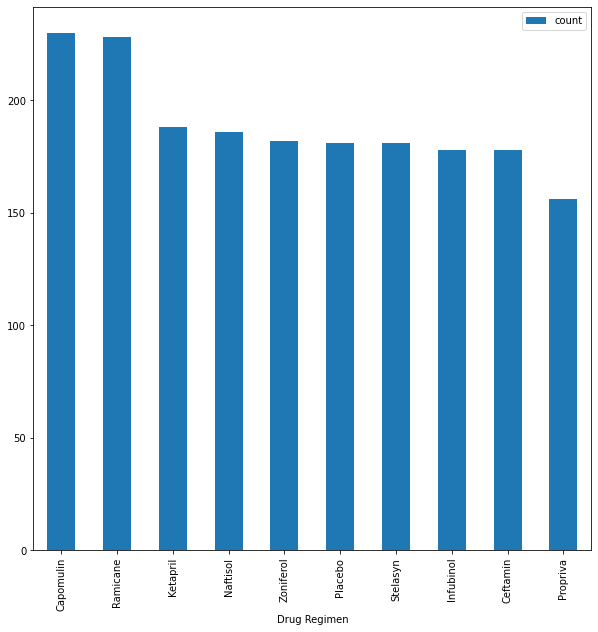

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart
#https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
overall_drug_summary['count']=overall_drug_summary['count'].astype(float)
overall_drug_summary.plot.bar(x="Drug Regimen",y='count' ,figsize=(10,10),
                         )

<AxesSubplot:xlabel='Drug Regimen', ylabel='Count'>

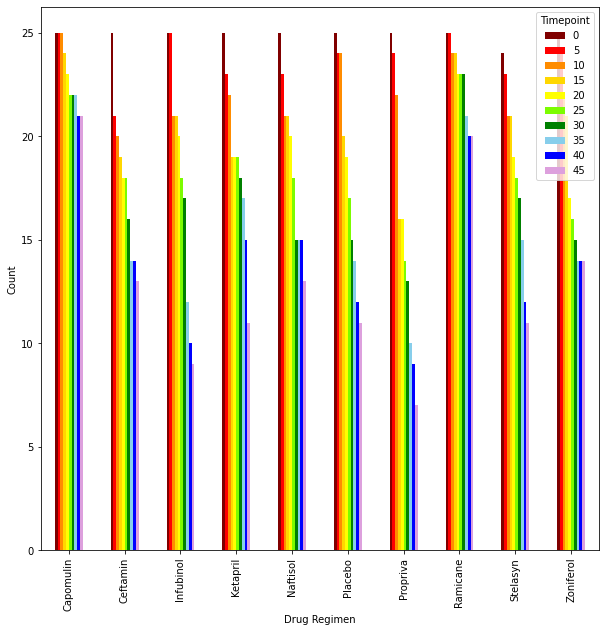

In [22]:
#https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
test  = trimmed_df.groupby(['Drug Regimen','Timepoint'])
test2 = test['Timepoint'].count()
test2.unstack().plot.bar(ylabel="Count",figsize=(10,10),
                         color = ['maroon','red','darkorange','gold','yellow',
                                 'lawngreen','green','skyblue','blue','plum'])

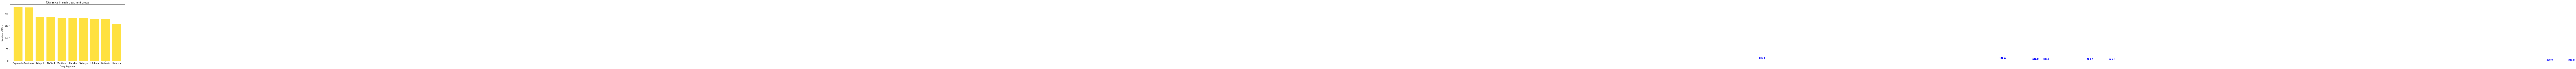

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0, len(overall_drug_summary))
tick_loc = []
y_axis = overall_drug_summary['count']
for x in x_axis:
    tick_loc.append(x)

plt.figure(figsize=(10, 5), dpi=60)
plt.title('Total mice in each treatment group')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.xlim(-0.75,len(overall_drug_summary)-0.25)
plt.ylim(0,max(overall_drug_summary['count'])+10)


plt.bar(x_axis,y_axis, facecolor = 'Gold',alpha = 0.75,align='center')

for i, v in enumerate(y_axis):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.xticks(tick_loc,overall_drug_summary['Drug Regimen'])



plt.show()


#lol_df = lol_df.set_index(['Drug Regimen', 'Timepoint']).counts
#plt.bar(lol_df.index.values, lol_df['counts'], color="r", align="center")

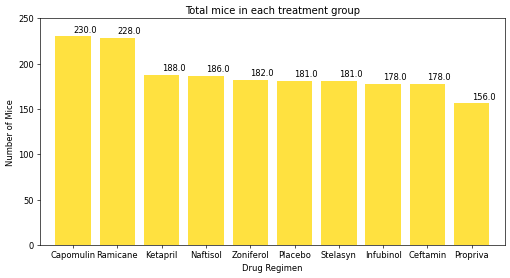

In [24]:
fig, ax = plt.subplots(figsize = (10,5), dpi=60)

x_axis = np.arange(0, len(overall_drug_summary))
tick_loc = []
y_axis = overall_drug_summary['count']
for x in x_axis:
    tick_loc.append(x)

plt.title('Total mice in each treatment group')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.xlim(-0.75,len(overall_drug_summary)-0.25)
plt.ylim(0,max(overall_drug_summary['count'])+20)


ax.bar(x_axis,y_axis, facecolor = 'Gold',alpha = 0.75,align='center')

for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+5 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.xticks(tick_loc,overall_drug_summary['Drug Regimen'])



plt.show()

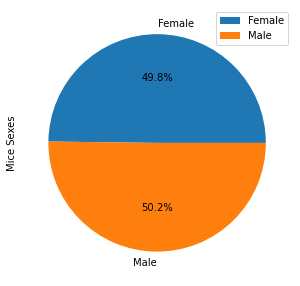

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
indvidual_mice_df = merged_df.drop_duplicates(['Mouse ID'])
sex_group_df = indvidual_mice_df.groupby(['Sex']).count()
sex_group_df["Mice Sexes"] = sex_group_df['Mouse ID']
plot = sex_group_df.plot.pie(y="Mice Sexes", figsize=(5, 5), autopct='%1.1f%%')


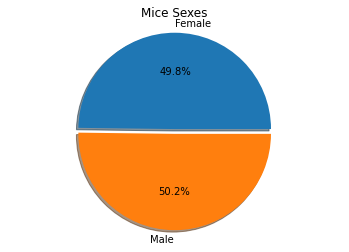

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mice Sexes")
explode = [0,0.05]
plt.pie(sex_group_df['Mice Sexes'],explode =explode ,  labels=sex_group_df.index.values,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tester_df = trimmed_df.drop_duplicates(subset = ['Mouse ID'], keep = 'last')
last_r_capomulin_df = tester_df[tester_df['Drug Regimen'].isin(options)]
last_r_capomulin_df = last_r_capomulin_df.sort_values(by=['Drug Regimen'])
last_r_capomulin_df.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,j246,Capomulin,Female,21,21,35,38.753265,1
1,v923,Capomulin,Female,19,21,45,40.658124,2
2,w150,Capomulin,Male,23,23,10,39.952347,0
3,j119,Capomulin,Female,7,23,45,38.125164,1
4,l509,Capomulin,Male,17,21,45,41.483008,3
...,...,...,...,...,...,...,...,...
95,r921,Ramicane,Female,5,25,30,43.419381,1
96,w678,Ramicane,Female,5,24,5,43.166373,0
97,y449,Ramicane,Male,19,24,15,44.183451,0
98,r811,Ramicane,Male,9,19,45,37.225650,1


In [28]:

blank_df= pd.DataFrame(columns=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
blank_df
outlier_df = blank_df
outlier_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
lowerq = []
upperq = []
iqr = []
lower_bound = []
upper_bound = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in options:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = last_r_capomulin_df['Tumor Volume (mm3)'][last_r_capomulin_df['Drug Regimen'] == x].quantile([0.25,0.5,0.75])
    
    lowq  = quartiles[0.25]
    highq = quartiles[0.75]
    in_quart_r = highq - lowq
    lower_b = (lowq - (1.5*in_quart_r))
    upper_b = (highq + (1.5*in_quart_r))
    
    lowerq.append(quartiles[0.25])
    upperq.append(quartiles[0.75])
    iqr.append(lowq - highq)
    lower_bound.append(lowq - (1.5*in_quart_r))
    upper_bound.append(highq + (1.5*in_quart_r))
    print(quartiles)
    print(highq)
    print(upper_b)
    test_df = last_r_capomulin_df[last_r_capomulin_df['Drug Regimen'] == x].reset_index(drop=True)
    #print(test_df)
    for x in test_df.index :
        #print(test_df.loc[x])
        out = test_df.loc[x,'Tumor Volume (mm3)']
        #print(out)
        if (lower_b < out < upper_b) :
            blank_df = blank_df.append(test_df.loc[x,'Mouse ID':'Metastatic Sites'])
        if (out <lower_b or upper_b< out) :
            outlier_df = outlier_df.append(test_df.loc[x,'Mouse ID':'Metastatic Sites'])
        
         
    #test_up_df = (test_df['Tumor Volume (mm3)'] >= upper_b)
    #print(np.where(test_up_df))
    #test_low_df = (test_df[test_df['Tumor Volume (mm3)'] <= lower_b])
    #print(np.where(test_low_df))
    #print(test_low_df)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

blank_df
outlier_df


0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
40.1592203
51.83201549
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
40.65900627
54.30681135
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
65.52574285
82.74144559000001
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
64.29983003
87.66645829999999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,c326,Infubinol,Female,18,25,5,36.321346,0


In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = {}
for x in options:
    data[x] = blank_df[blank_df['Drug Regimen'] == x].reset_index(drop=True)

([<matplotlib.axis.XTick at 0x1d1284bfbb0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

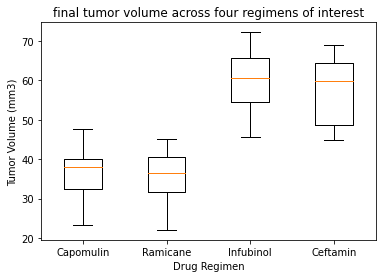

In [31]:
# Generate a box plot of the  of each mouse 

fig1, ax1 = plt.subplots()
ax1.set_title('final tumor volume across four regimens of interest')
dt = [data['Capomulin']['Tumor Volume (mm3)'],data['Ramicane']['Tumor Volume (mm3)'],data['Infubinol']['Tumor Volume (mm3)'],data['Ceftamin']['Tumor Volume (mm3)']]
ax1.boxplot(dt)

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],options)

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

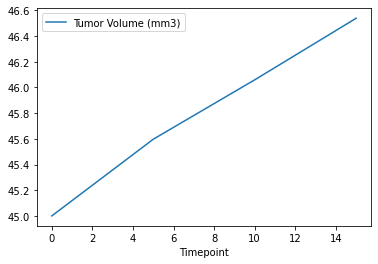

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#https://datatofish.com/convert-pandas-dataframe-to-list/
capomulin_drug_df = trimmed_df.loc[(trimmed_df['Drug Regimen'] == 'Capomulin')]

capomulin_mouse = capomulin_drug_df.drop_duplicates(subset = ['Mouse ID'], keep = 'first')
mouse_list = capomulin_mouse['Mouse ID'].values.tolist()
mouse = random.choice(mouse_list)
capomulin_drug_df = trimmed_df.loc[(trimmed_df['Mouse ID'] == mouse)]

#mouse = random.choice(capomulin_mouse)
capomulin_drug_df.plot(x='Timepoint',y='Tumor Volume (mm3)')
#mouse

In [33]:
capomulin_drug_df = trimmed_df.loc[(trimmed_df['Drug Regimen'] == 'Capomulin')]

capomulin_mouse = capomulin_drug_df.drop_duplicates(subset = ['Mouse ID'], keep = 'first')
mouse_list = capomulin_mouse['Mouse ID'].values.tolist()
mouse = random.choice(mouse_list)
capomulin_mouse_df = trimmed_df.loc[(trimmed_df['Mouse ID'] == mouse)]
capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


In [34]:
capomulin_mouse_df.loc[:,'Tumor Volume (mm3)'].round(3)
capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


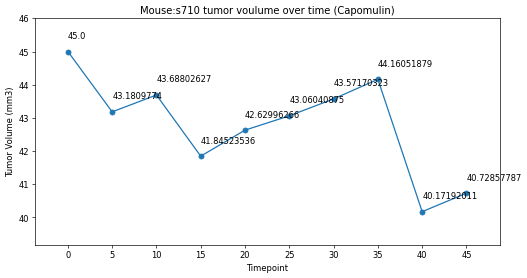

In [35]:
fig, ax = plt.subplots(figsize = (10,5), dpi=60)

x_axis = np.arange(0, len(capomulin_mouse_df))
tick_loc = []
y_axis = capomulin_mouse_df['Tumor Volume (mm3)']
for x in x_axis:
    tick_loc.append(x)

plt.title(f'Mouse:{mouse} tumor voulume over time (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(-0.75,len(capomulin_mouse_df)-0.25)
plt.ylim(min(capomulin_mouse_df['Tumor Volume (mm3)'])-1,max(capomulin_mouse_df['Tumor Volume (mm3)'])+1)


ax.plot(x_axis,y_axis, marker='o')

for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+0.4 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.xticks(tick_loc,capomulin_mouse_df['Timepoint'])



plt.show()

In [36]:
capomulin_group_df = capomulin_drug_df[['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby(['Mouse ID'])
capomulin_av_tumor = capomulin_group_df.mean()
capomulin_av_tumor = capomulin_av_tumor.rename(columns={'Tumor Volume (mm3)': 'Average Tumor'})
capomulin_av_tumor

,Weight (g),Average Tumor
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


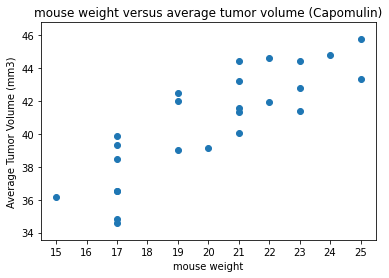

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_axis = capomulin_av_tumor['Weight (g)']
y_axis = capomulin_av_tumor['Average Tumor']

plt.title('mouse weight versus average tumor volume (Capomulin)')
plt.xlabel('mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.xlim(-0.5 + min (capomulin_av_tumor['Weight (g)']),max(capomulin_av_tumor['Weight (g)'])+0.5)
plt.ylim(min(capomulin_av_tumor['Average Tumor'])-1,max(capomulin_av_tumor['Average Tumor'])+1)

plt.scatter(x_axis,y_axis)

plt.xticks(np.arange(min(capomulin_av_tumor['Weight (g)']), max(capomulin_av_tumor['Weight (g)'])+1, step=1))


plt.show()

## Correlation and Regression

0.84

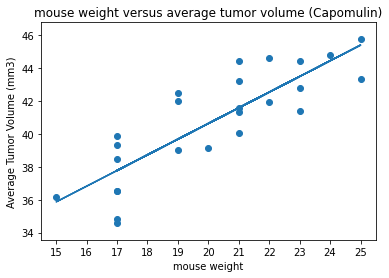

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_slope, tumor_int, tumor_r, tumor_p, tumor_std_err = st.linregress(capomulin_av_tumor['Weight (g)'], capomulin_av_tumor['Average Tumor'])
tumor_fit = tumor_slope * capomulin_av_tumor['Weight (g)'] + tumor_int

plt.title('mouse weight versus average tumor volume (Capomulin)')
plt.xlabel('mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.xlim(-0.5 + min (capomulin_av_tumor['Weight (g)']),max(capomulin_av_tumor['Weight (g)'])+0.5)
plt.ylim(min(capomulin_av_tumor['Average Tumor'])-1,max(capomulin_av_tumor['Average Tumor'])+1)
plt.xticks(np.arange(min(capomulin_av_tumor['Weight (g)']), max(capomulin_av_tumor['Weight (g)'])+1, step=1))

plt.scatter(x_axis,y_axis)
plt.plot(capomulin_av_tumor['Weight (g)'],tumor_fit)
correlation = st.pearsonr(capomulin_av_tumor['Weight (g)'],capomulin_av_tumor['Average Tumor'])
round(correlation[0],2)